In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_csv ('/users/Sergio/Documents/Python docs/BaseD.csv')
datos.head()

,ID,Añonatural3,Fechaconstitución,Estadodummy,Incubada,ActividadInternacionalDummy,CantidadMarcasenpropiedad,Provincia,cnae2d,Edad_días3,...,gtosexplotratio_mean,pasivototal_mean,debtassetratio_mean,cashflowratio_mean,ratiocoberturaintereses_mean,tangibleratio_mean,equityperemployee_mean,salesperemployee_mean,innovationperemployee_mean,innovationtosales_mean
0,1,2019,21/12/2009,0,1,1,0,Madrid,71,3662,...,"-0,636",NaN,NaN,NaN,NaN,NaN,"-25,124","23,353","8,911","0,364"
1,2,2019,15/4/2008,0,1,1,5,Madrid,72,4277,...,"-1,705","3016,740","0,454","0,074","4,979","6,103","341,504","20,945","40,622","1,966"
2,3,2019,2/11/2011,0,1,0,1,Pontevedra,73,2981,...,"-0,228",NaN,NaN,NaN,"-83,979","4,781","8,881","124,913","41,609","0,346"
3,4,2019,14/3/2005,0,1,0,1,Asturias,49,5405,...,"-0,315","411,556","0,401","0,072","-8,139","49,345","41,806","61,648","39,169","0,641"
4,5,2019,24/6/2009,0,1,0,1,Madrid,72,3842,...,NaN,"1839,133","0,346","0,844","5,252","0,041","791,092",NaN,"54,050",NaN


In [3]:
# geting a list of the order of columns to reorder later
print (datos.columns)

Index(['ID', 'Añonatural3', 'Fechaconstitución', 'Estadodummy', 'Incubada',
       'ActividadInternacionalDummy', 'CantidadMarcasenpropiedad', 'Provincia',
       'cnae2d', 'Edad_días3', 'año_constitucion', 'Númeroempleados_mean',
       'Activonocorriente_mean', 'Activocorriente_mean',
       'Pasivonocorriente_mean', 'Pasivocorriente_mean',
       'Totalpatrimonionetoypasivo_mean', 'Patrimonioneto_mean',
       'Fondospropios_mean', 'RatioEndeudamiento_mean', 'Ventasnetas_mean',
       'Gastosdepersonal_mean', 'OtrosGtosExp_mean', 'Amortizacion_mean',
       'Resultadodeexplotación_mean', 'Resultadofinanciero_mean',
       'Efectivo_mean', 'Gastosfin_mean', 'InmovMat_mean', 'Aprovisiona_mean',
       'VA_mean', 'fondomaniobra_mean', 'totalactivo_mean',
       'ratiofondomaniobra_mean', 'equity_mean', 'eficiencia_mean',
       'liquidez_mean', 'margenbruto_mean', 'materiales_mean',
       'costelaboral_mean', 'gtosexplotratio_mean', 'pasivototal_mean',
       'debtassetratio_mean', 'c

In [4]:
# Table comparation filled unfilled
import matplotlib.pyplot as plt
datossinnan=datos
datossinnan=datossinnan.dropna()


tabla = [[' ', ' ', 'Estadodummy','Estadodummy','Total'], 
         [' ', ' ', 'Viva','Muerta',' '], 
         ['Incubada:', 'No', sum((datos.Incubada == 0)& (datos.Estadodummy == 0)),
          sum((datos.Incubada == 0)& (datos.Estadodummy == 1)),sum(datos.Incubada == 0)],
         ['Incubada:', 'Si', sum((datos.Incubada == 1)& (datos.Estadodummy == 0)),
          sum((datos.Incubada == 1)& (datos.Estadodummy == 1)),sum(datos.Incubada == 1)],
        [' ','Total',sum(datos.Estadodummy == 0),sum(datos.Estadodummy == 1),datos['Incubada'].count()]]

from tabulate import tabulate
print("All data rows separated by booleans (380 in total)")
print(tabulate(tabla))
print("\n"*4)
print ("Only rows with all data filled (170 in total)")
# Sin NaN
tabla = [[' ', ' ', 'Estadodummy','Estadodummy','Total'], 
         [' ', ' ', 'Viva','Muerta',' '], 
         ['Incubada:', 'No', sum((datossinnan.Incubada == 0)& (datossinnan.Estadodummy == 0)),
          sum((datossinnan.Incubada == 0)& (datossinnan.Estadodummy == 1)),sum(datossinnan.Incubada == 0)],
         ['Incubada:', 'Si', sum((datossinnan.Incubada == 1)& (datossinnan.Estadodummy == 0)),
          sum((datossinnan.Incubada == 1)& (datossinnan.Estadodummy == 1)),sum(datossinnan.Incubada == 1)],
        [' ','Total',sum(datossinnan.Estadodummy == 0),sum(datossinnan.Estadodummy == 1),datossinnan['Incubada'].count()]]

print(tabulate(tabla))

All data rows separated by booleans (380 in total)
---------  -----  -----------  -----------  -----
                  Estadodummy  Estadodummy  Total
                  Viva         Muerta
Incubada:  No     129          61           190
Incubada:  Si     129          61           190
           Total  258          122          380
---------  -----  -----------  -----------  -----





Only rows with all data filled (170 in total)
---------  -----  -----------  -----------  -----
                  Estadodummy  Estadodummy  Total
                  Viva         Muerta
Incubada:  No     57           25           82
Incubada:  Si     64           24           88
           Total  121          49           170
---------  -----  -----------  -----------  -----


In [5]:
# 3 rows found with all values empty (not able to predict)
# Previously detected
datos=datos.drop([22,129,155,162,189,297])

In [6]:
# Dataframe has 374 enterprises
datos.ID.count()

374

In [7]:
print ("[----unfilled data by variable----]")
datos.isnull().sum().sort_values()

[----unfilled data by variable----]


ID                                   0
Patrimonioneto_mean                  0
Totalpatrimonionetoypasivo_mean      0
Activocorriente_mean                 0
año_constitucion                     0
Fondospropios_mean                   0
cnae2d                               0
Edad_días3                           0
CantidadMarcasenpropiedad            0
ActividadInternacionalDummy          0
Incubada                             0
Estadodummy                          0
Fechaconstitución                    0
Añonatural3                          0
Provincia                            0
RatioEndeudamiento_mean              0
liquidez_mean                        3
fondomaniobra_mean                   3
VA_mean                              3
OtrosGtosExp_mean                    3
Resultadodeexplotación_mean          3
Pasivocorriente_mean                 3
innovationtosales_mean               8
gtosexplotratio_mean                 8
margenbruto_mean                     8
Ventasnetas_mean         

In [8]:
# Data not relevant
Outdata=datos.filter(["Provincia","Fechaconstitución"], axis=1)
datos=datos.drop(["Fechaconstitución"], axis= 1)
datos=datos.drop(["Provincia"], axis= 1)

In [9]:
# Data right format commas and dots
# As they are actually objects:
# "," means decimal, I use "." to python
datos['Númeroempleados_mean'] = datos['Númeroempleados_mean'].str.replace(',','.')
datos["equity_mean"]= datos["equity_mean"].str.replace(',','.')
datos["ratiofondomaniobra_mean"]= datos["ratiofondomaniobra_mean"].str.replace(',','.')
datos["eficiencia_mean"]= datos["eficiencia_mean"].str.replace(',','.')
datos["debtassetratio_mean"]= datos["debtassetratio_mean"].str.replace(',','.')
datos["cashflowratio_mean"]= datos["cashflowratio_mean"].str.replace(',','.')
datos["ratiocoberturaintereses_mean"]= datos["ratiocoberturaintereses_mean"].str.replace(',','.')
datos["tangibleratio_mean"]= datos["tangibleratio_mean"].str.replace(',','.')
datos["RatioEndeudamiento_mean"]= datos["RatioEndeudamiento_mean"].str.replace(',','.')


# "," means thousands I quit it

datos["Activonocorriente_mean"]= datos["Activonocorriente_mean"].str.replace(',','')
datos["Activocorriente_mean"]= datos["Activocorriente_mean"].str.replace(',','')
datos["Pasivonocorriente_mean"]= datos["Pasivonocorriente_mean"].str.replace(',','')
datos["Pasivocorriente_mean"]= datos["Pasivocorriente_mean"].str.replace(',','')
datos["Totalpatrimonionetoypasivo_mean"]= datos["Totalpatrimonionetoypasivo_mean"].str.replace(',','')
datos["Patrimonioneto_mean"]= datos["Patrimonioneto_mean"].str.replace(',','')
datos["Fondospropios_mean"]= datos["Fondospropios_mean"].str.replace(',','')

datos["Ventasnetas_mean"]= datos["Ventasnetas_mean"].str.replace(',','')
datos["Gastosdepersonal_mean"]= datos["Gastosdepersonal_mean"].str.replace(',','')
datos["OtrosGtosExp_mean"]= datos["OtrosGtosExp_mean"].str.replace(',','')
datos["Amortizacion_mean"]= datos["Amortizacion_mean"].str.replace(',','')
datos["Resultadodeexplotación_mean"]= datos["Resultadodeexplotación_mean"].str.replace(',','')
datos["Resultadofinanciero_mean"]= datos["Resultadofinanciero_mean"].str.replace(',','')
datos["Efectivo_mean"]= datos["Efectivo_mean"].str.replace(',','')
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].str.replace(',','')
datos["InmovMat_mean"]= datos["InmovMat_mean"].str.replace(',','')
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].str.replace(',','')
datos["Aprovisiona_mean"]= datos["Aprovisiona_mean"].str.replace(',','')
datos["VA_mean"]= datos["VA_mean"].str.replace(',','')
datos["fondomaniobra_mean"]= datos["fondomaniobra_mean"].str.replace(',','')
datos["totalactivo_mean"]= datos["totalactivo_mean"].str.replace(',','')


datos["liquidez_mean"]= datos["liquidez_mean"].str.replace(',','')
datos["margenbruto_mean"]= datos["margenbruto_mean"].str.replace(',','')
datos["materiales_mean"]= datos["materiales_mean"].str.replace(',','')
datos["costelaboral_mean"]= datos["costelaboral_mean"].str.replace(',','')
datos["gtosexplotratio_mean"]= datos["gtosexplotratio_mean"].str.replace(',','')
datos["pasivototal_mean"]= datos["pasivototal_mean"].str.replace(',','')

datos["equityperemployee_mean"]= datos["equityperemployee_mean"].str.replace(',','')
datos["salesperemployee_mean"]= datos["salesperemployee_mean"].str.replace(',','')
datos["innovationperemployee_mean"]= datos["innovationperemployee_mean"].str.replace(',','')
datos["innovationtosales_mean"]= datos["innovationtosales_mean"].str.replace(',','')



# Changing expenses variables to positive
datos["Gastosdepersonal_mean"]= datos["Gastosdepersonal_mean"].str.replace('-','')
datos["OtrosGtosExp_mean"]= datos["OtrosGtosExp_mean"].str.replace('-','')
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].str.replace('-','')
datos["Aprovisiona_mean"]= datos["Aprovisiona_mean"].str.replace('-','')
datos["materiales_mean"]= datos["materiales_mean"].str.replace('-','')
datos["costelaboral_mean"]= datos["costelaboral_mean"].str.replace('-','')
datos["gtosexplotratio_mean"]= datos["gtosexplotratio_mean"].str.replace('-','')


# #####################
# Giving right format (float)
datos['Incubada']=datos['Incubada'].astype(bool)
datos['Estadodummy']=datos['Estadodummy'].astype(bool)

datos['Númeroempleados_mean'] = datos['Númeroempleados_mean'].astype(float)
datos["RatioEndeudamiento_mean"]= datos["RatioEndeudamiento_mean"].astype(float)
datos["ratiofondomaniobra_mean"]= datos["ratiofondomaniobra_mean"].astype(float)
datos["equity_mean"]= datos["equity_mean"].astype(float)
datos["eficiencia_mean"]= datos["eficiencia_mean"].astype(float)
datos["debtassetratio_mean"]= datos["debtassetratio_mean"].astype(float)
datos["cashflowratio_mean"]= datos["cashflowratio_mean"].astype(float)
datos["ratiocoberturaintereses_mean"]= datos["ratiocoberturaintereses_mean"].astype(float)
datos["tangibleratio_mean"]= datos["tangibleratio_mean"].astype(float)



datos["Activonocorriente_mean"]= datos["Activonocorriente_mean"].astype(float)
datos["Activocorriente_mean"]= datos["Activocorriente_mean"].astype(float)
datos["Pasivonocorriente_mean"]= datos["Pasivonocorriente_mean"].astype(float)
datos["Pasivocorriente_mean"]= datos["Pasivocorriente_mean"].astype(float)
datos["Totalpatrimonionetoypasivo_mean"]= datos["Totalpatrimonionetoypasivo_mean"].astype(float)
datos["Patrimonioneto_mean"]= datos["Patrimonioneto_mean"].astype(float)
datos["Fondospropios_mean"]= datos["Fondospropios_mean"].astype(float)

datos["Ventasnetas_mean"]= datos["Ventasnetas_mean"].astype(float)
datos["Gastosdepersonal_mean"]= datos["Gastosdepersonal_mean"].astype(float)
datos["OtrosGtosExp_mean"]= datos["OtrosGtosExp_mean"].astype(float)
datos["Amortizacion_mean"]= datos["Amortizacion_mean"].astype(float)
datos["Resultadodeexplotación_mean"]= datos["Resultadodeexplotación_mean"].astype(float)
datos["Resultadofinanciero_mean"]= datos["Resultadofinanciero_mean"].astype(float)
datos["Efectivo_mean"]= datos["Efectivo_mean"].astype(float)
datos["InmovMat_mean"]= datos["InmovMat_mean"].astype(float)
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].astype(float)
datos["Aprovisiona_mean"]= datos["Aprovisiona_mean"].astype(float)
datos["VA_mean"]= datos["VA_mean"].astype(float)
datos["fondomaniobra_mean"]= datos["fondomaniobra_mean"].astype(float)
datos["totalactivo_mean"]= datos["totalactivo_mean"].astype(float)

datos["liquidez_mean"]= datos["liquidez_mean"].astype(float)
datos["margenbruto_mean"]= datos["margenbruto_mean"].astype(float)
datos["materiales_mean"]= datos["materiales_mean"].astype(float)
datos["costelaboral_mean"]= datos["costelaboral_mean"].astype(float)
datos["gtosexplotratio_mean"]= datos["gtosexplotratio_mean"].astype(float)
datos["pasivototal_mean"]= datos["pasivototal_mean"].astype(float)

datos["equityperemployee_mean"]= datos["equityperemployee_mean"].astype(float)
datos["salesperemployee_mean"]= datos["salesperemployee_mean"].astype(float)
datos["innovationperemployee_mean"]= datos["innovationperemployee_mean"].astype(float)
datos["innovationtosales_mean"]= datos["innovationtosales_mean"].astype(float)


# Inversing sign of ratios with expenses
datos["ratiocoberturaintereses_mean"]= datos["ratiocoberturaintereses_mean"]*(-1)
datos["Amortizacion_mean"]= datos["Amortizacion_mean"]*(-1)

In [10]:
# sample view
datos.iloc[10]

ID                                       11
Añonatural3                            2019
Estadodummy                           False
Incubada                               True
ActividadInternacionalDummy               0
CantidadMarcasenpropiedad                 2
cnae2d                                   46
Edad_días3                             4044
año_constitucion                       2008
Númeroempleados_mean                    1.0
Activonocorriente_mean              22059.0
Activocorriente_mean                19784.0
Pasivonocorriente_mean               6780.0
Pasivocorriente_mean                15271.0
Totalpatrimonionetoypasivo_mean     41843.0
Patrimonioneto_mean                 19792.0
Fondospropios_mean                  19792.0
RatioEndeudamiento_mean              16.749
Ventasnetas_mean                   107694.0
Gastosdepersonal_mean               16056.0
OtrosGtosExp_mean                   37544.0
Amortizacion_mean                    1040.0
Resultadodeexplotación_mean     

In [11]:
# KNN imputation

# Considerations:
# Ratios variables are variables related to another: equity = current assets/ current liabilities
# Ratios are not be to be imputed by KNN, as they depend of the imputation of other variables
# So I save those ratios variables to enter them later and recalculate them

ratios= datos[['ID','innovationtosales_mean','innovationperemployee_mean','salesperemployee_mean',
               'equityperemployee_mean','tangibleratio_mean','ratiocoberturaintereses_mean',
               'cashflowratio_mean','debtassetratio_mean','gtosexplotratio_mean','costelaboral_mean',
               'materiales_mean','margenbruto_mean','liquidez_mean','eficiencia_mean','equity_mean',
               'ratiofondomaniobra_mean','RatioEndeudamiento_mean']].copy()

In [12]:
datos.drop(['innovationtosales_mean','innovationperemployee_mean','salesperemployee_mean',
            'equityperemployee_mean','tangibleratio_mean','ratiocoberturaintereses_mean',
            'cashflowratio_mean','debtassetratio_mean','gtosexplotratio_mean','costelaboral_mean',
            'materiales_mean','margenbruto_mean','liquidez_mean','eficiencia_mean','equity_mean',
            'ratiofondomaniobra_mean','RatioEndeudamiento_mean'],axis=1, inplace= True)                  

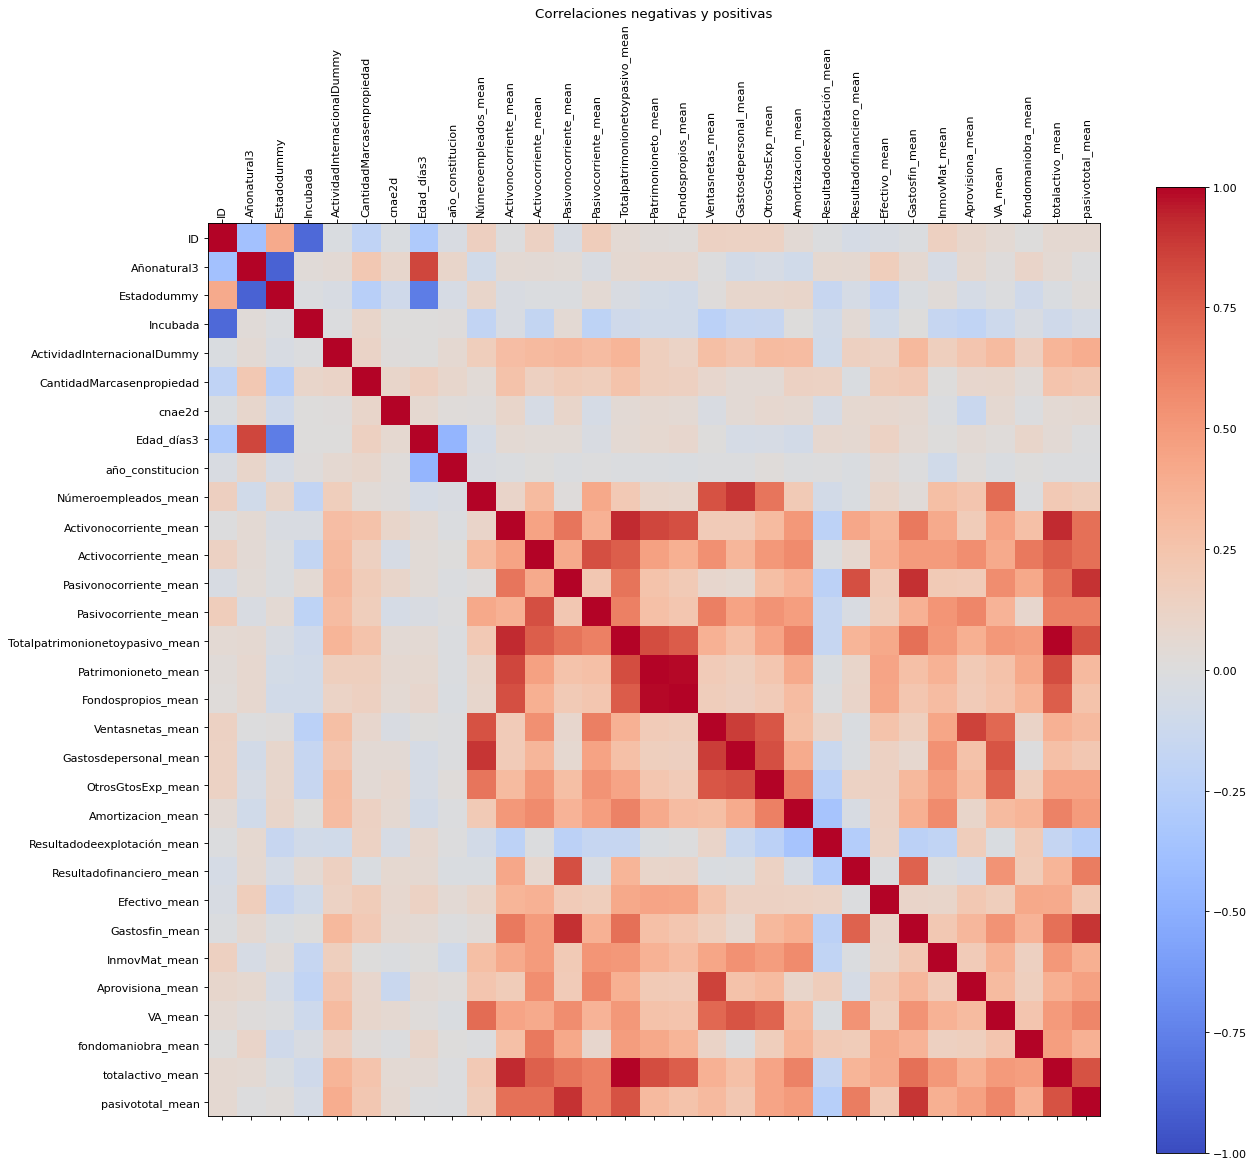

In [13]:
# correlations


corr = datos.corr()
fig = plt.figure(figsize=(18, 16), dpi=80)

ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(datos.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(datos.columns)
ax.set_yticklabels(datos.columns)
plt.title("Correlaciones negativas y positivas")
plt.show()

In [14]:
# first variables( info variables like year..days..activity) have no correlation with accounting variables
# They are all filled so we can also separate them to prediction 
infovars=datos[datos.columns[[0,1,4,5,6,7,8]]].copy()
cols=[0,1,4,5,6,7,8]
datos.drop(datos.columns[cols], axis=1, inplace= True)


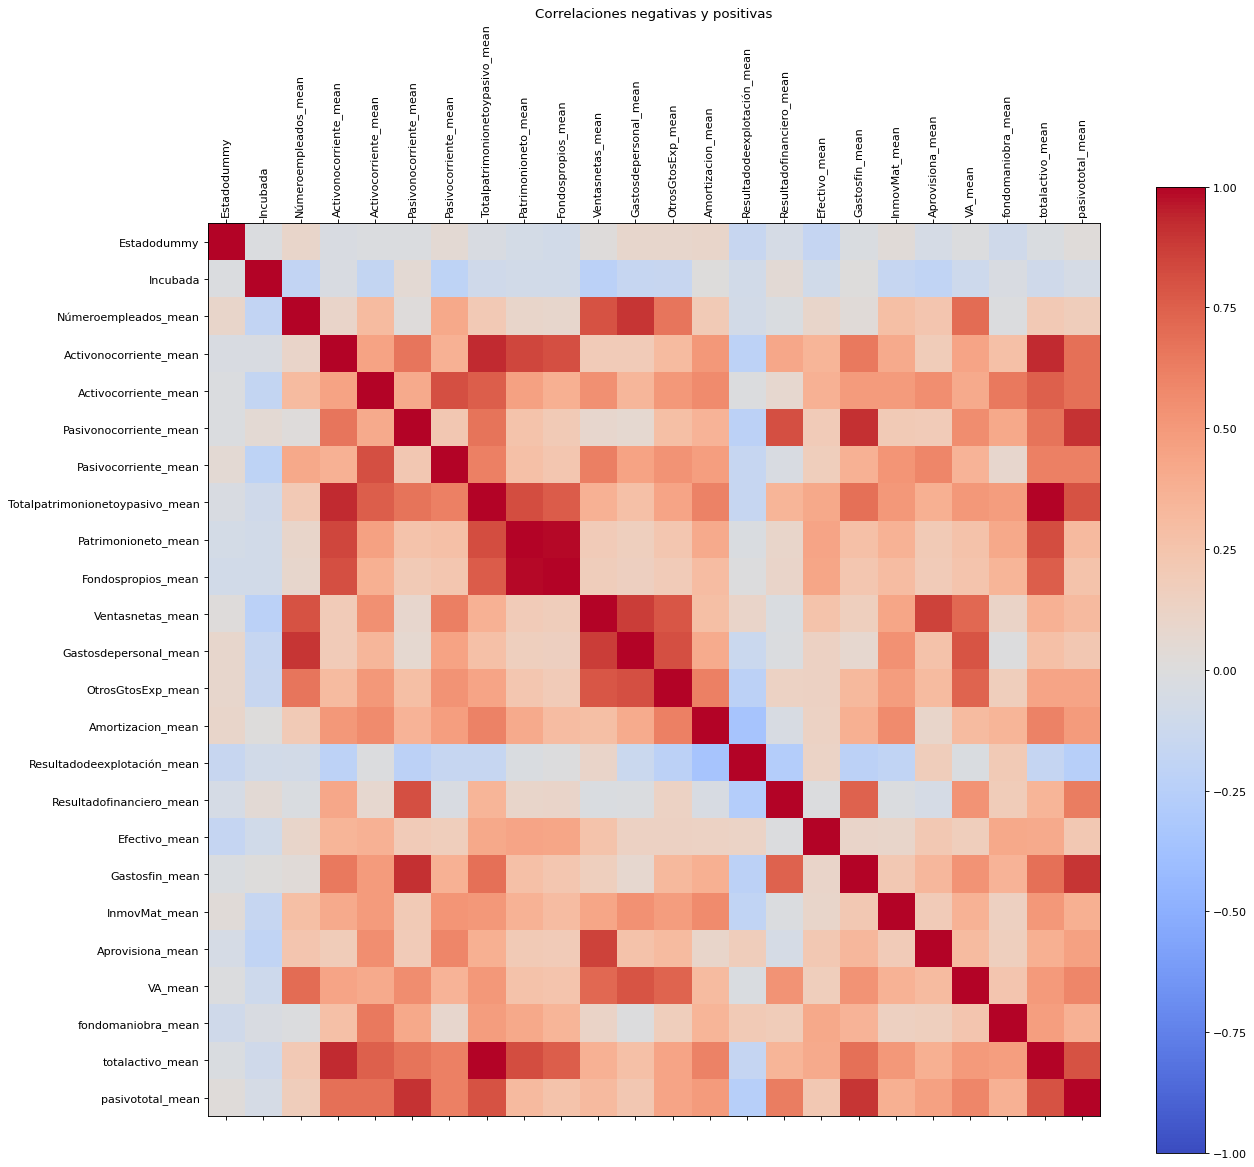

In [15]:
# Correlations Variables on KNN
# correlations


corr = datos.corr()
fig = plt.figure(figsize=(18, 16), dpi=80)

ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(datos.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(datos.columns)
ax.set_yticklabels(datos.columns)
plt.title("Correlaciones negativas y positivas")
plt.show()

### Imputation with KNN

## KNN is an algorithm correct for multidimensional variables that allows to predict classification but also values like in this case. The point is that is multidimensional, so it uses more than 1 variable for their predictions.
On this case we have 24 variables and a good bunch of correlations to predict each one.
The precission of KNN should depend of the number of nearest neighbors selected (K). To determine K it's common to divide Data on Train and Test and check the accuracy on different Ks, but this case has to predict values on all variables and not just one column and it takes me to a faster way and more viable that is look at the density for each K , the density nearest to the Original distribution must be more accurate.


We can see that because of the quantity of variables ( that make the algorithm richer) Density does not have relevant changes so any K would have the same accuracy according to the graph plotted.

In [16]:
from sklearn.impute import KNNImputer

In [17]:
density = datos.copy(deep=True)

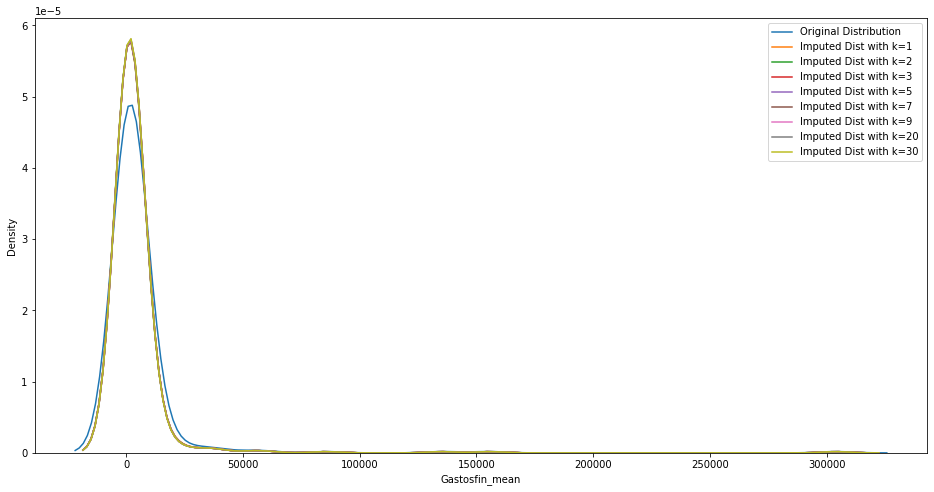

In [18]:
# Density 

n_neighbors = [1, 2, 3, 5, 7, 9, 20, 30]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sb.kdeplot(datos.Gastosfin_mean, label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    density.loc[:, :] = knn_imp.fit_transform(datos)
    sb.kdeplot(density.Gastosfin_mean, label=f"Imputed Dist with k={k}")

plt.legend();

Even it seems not relevant: Going deeper to find best K

##### I just want to go one step foward and be original to select the best K anyway, so I will test different values of K with a personal though: I decided to apply a bunch of KNNImputers with different K and test in 2 variables , and checking that results I will get the nearest to the mean of all the results, so I will get a K in the center of that % of difference between different values of K. As we will see, difference is not relevant and It is 2.5% and 0.9% on each variable tested, going from 2 to 30 neighbors, but that can give and intermediate point on that variation.

In [19]:
# k= 2
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
datos2knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
datos3knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 4
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
datos4knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 5
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
datos5knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 6
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
datos6knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 7
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
datos7knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 8
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8)
datos8knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 9
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
datos9knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 10
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
datos10knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 11
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)
datos11knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 13
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=13)
datos13knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 15
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=15)
datos15knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 17
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=17)
datos17knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 20
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)
datos20knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 25
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=25)
datos25knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 30
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=30)
datos30knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

In [20]:
###SELECCIÓN#### Pasivonocorriente_mean             138
# pasivototal_mean                   138
# debtassetratio_mean                142
# cashflowratio_mean                 147

print ("Mean of K imputers means:")
print (datos2knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos3knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos4knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos5knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos6knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos7knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos8knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos9knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos10knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos11knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos13knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos15knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos17knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos20knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos25knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos30knn["Pasivonocorriente_mean"].mean(axis=0))

# comprobamos que no es una media y que se utilizaron KNN 
# con la media de los datos originales
print ("MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because it depends of the variables for rows")
print (datos["Pasivonocorriente_mean"].mean(axis=0))

print (3* "\n"+"varition in %:")
print (((168681-164791)*100)/168681 )
print ("desperciable")
print( 3* "\n" +"Mean point (mean of K imputers means):")
print ((datos2knn["Pasivonocorriente_mean"].mean(axis=0)+datos3knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos4knn["Pasivonocorriente_mean"].mean(axis=0)+datos5knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos6knn["Pasivonocorriente_mean"].mean(axis=0)+datos7knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos8knn["Pasivonocorriente_mean"].mean(axis=0)+datos9knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos10knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos11knn["Pasivonocorriente_mean"].mean(axis=0)+datos13knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos15knn["Pasivonocorriente_mean"].mean(axis=0)+datos17knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos20knn["Pasivonocorriente_mean"].mean(axis=0)+datos25knn["Pasivonocorriente_mean"].mean(axis=0)+
        datos30knn["Pasivonocorriente_mean"].mean(axis=0))/16)

print (1* "\n" + "Best Neighbors")
print ( "\n"+"First near (to mean of K imputers means): ")
print ("K = 9 = 167098")
print ("Nearest: ")
print ("K= 9 = 167098")

Mean of K imputers means:
164791.3409090909
165460.23618538323
166262.6544117647
166656.53743315508
166975.48039215687
167255.54660045836
167078.07419786096
167098.65092097447
166958.4165775401
167195.66893534275
167303.28033730973
167761.7588235294
167828.2815350739
168287.5561497326
168400.0234224599
168681.46907308378
MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because it depends of the variables for rows
242393.71487603305



varition in %:
2.3061281353560865
desperciable



Mean point (mean of K imputers means):
167124.6859940573

Best Neighbors

First near (to mean of K imputers means): 
K = 9 = 167098
Nearest: 
K= 9 = 167098


In [21]:
# Pasivonocorriente_mean             138
####SELECCIÓN#### pasivototal_mean                   138
# debtassetratio_mean                142
# cashflowratio_mean                 147

print ("Mean of K imputers means:")
print (datos2knn["pasivototal_mean"].mean(axis=0))
print (datos3knn["pasivototal_mean"].mean(axis=0))
print (datos4knn["pasivototal_mean"].mean(axis=0))
print (datos5knn["pasivototal_mean"].mean(axis=0))
print (datos6knn["pasivototal_mean"].mean(axis=0))
print (datos7knn["pasivototal_mean"].mean(axis=0))
print (datos8knn["pasivototal_mean"].mean(axis=0))
print (datos9knn["pasivototal_mean"].mean(axis=0))
print (datos10knn["pasivototal_mean"].mean(axis=0))
print (datos11knn["pasivototal_mean"].mean(axis=0))
print (datos13knn["pasivototal_mean"].mean(axis=0))
print (datos15knn["pasivototal_mean"].mean(axis=0))
print (datos17knn["pasivototal_mean"].mean(axis=0))
print (datos20knn["pasivototal_mean"].mean(axis=0))
print (datos25knn["pasivototal_mean"].mean(axis=0))
print (datos30knn["pasivototal_mean"].mean(axis=0))

# comprobamos que no es una media y que se utilizaron KNN 
# con la media de los datos originales
print ("MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because "
       "it depends of the variables for rows")
print (datos["pasivototal_mean"].mean(axis=0))


print (3* "\n"+"variation in %:")
print (((328983-326981)*100)/328983 )
print ("desperciable")
print( 3* "\n" +"Mean point (mean of K imputers means):")
print ((datos2knn["pasivototal_mean"].mean(axis=0)+datos3knn["pasivototal_mean"].mean(axis=0)+
        datos4knn["pasivototal_mean"].mean(axis=0)+datos5knn["pasivototal_mean"].mean(axis=0)+
        datos6knn["pasivototal_mean"].mean(axis=0)+datos7knn["pasivototal_mean"].mean(axis=0)+
        datos8knn["pasivototal_mean"].mean(axis=0)+datos9knn["pasivototal_mean"].mean(axis=0)+
        datos10knn["pasivototal_mean"].mean(axis=0)+datos11knn["pasivototal_mean"].mean(axis=0)+
        datos13knn["pasivototal_mean"].mean(axis=0)+datos15knn["pasivototal_mean"].mean(axis=0)+
        datos17knn["pasivototal_mean"].mean(axis=0)+datos20knn["pasivototal_mean"].mean(axis=0)+
       datos25knn["pasivototal_mean"].mean(axis=0)+datos30knn["pasivototal_mean"].mean(axis=0))/16)

print (1* "\n" + "Best Neighbors:")
print ( "\n"+"First Near (to mean of K imputers means): ")
print ("K = 8 = 327910")
print ("K= 9 = 327461 also near to the mean")

print ( "Comparison with K=9 (best on previous test) : K=9= 328145, also near ")

Mean of K imputers means:
328087.05481283425
328613.38591800357
328983.4104278075
328741.76524064166
328373.497771836
328205.7192513369
327910.48562834226
327461.045751634
327139.5254010695
327253.89547885273
326981.8469765528
327132.177540107
327048.681975464
327447.43997326196
327309.82844919787
327395.0385026738
MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because it depends of the variables for rows
459778.0743801653



variation in %:
0.6085420827215996
desperciable



Mean point (mean of K imputers means):
327755.299943726

Best Neighbors:

First Near (to mean of K imputers means): 
K = 8 = 327910
K= 9 = 327461 also near to the mean
Comparison with K=9 (best on previous test) : K=9= 328145, also near 


After this variance of 2% and 0.6% in the two variables with more data unfilled (more data to imput)
The intermediate variance seems to be in K=9

### applying KNN with n=9

In [22]:
imputer = KNNImputer(n_neighbors=9)
datosKNN = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

Comparision correlations with KNN and previous


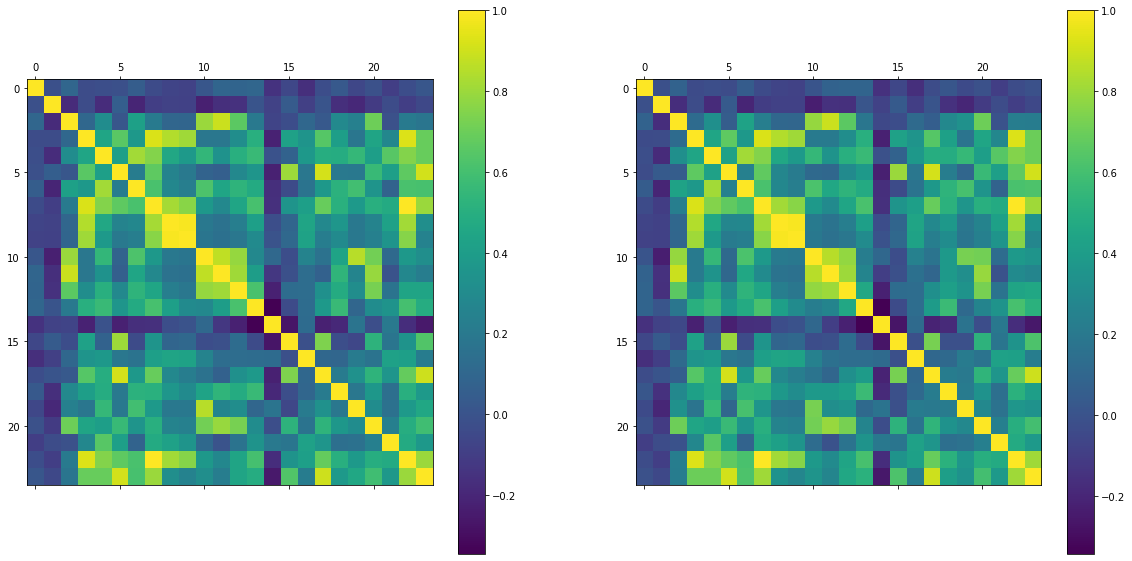

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

ax1, ax2 = axes

im1 = ax1.matshow(datos.corr())
im2 = ax2.matshow(datosKNN.corr())

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
print("Comparision correlations with KNN and previous")
plt.show()

In [24]:
datosKNN = datosKNN.reset_index(drop=True)
infovars= infovars.reset_index(drop=True)

In [25]:
# Once we have variables filled, we can insert variables unrelevant and insert ratios and calculate
# their unfilled

# variables unrelevant to KNN
datosKNN=datosKNN.join(infovars)

In [26]:
#inserting ratios variables
datosKNN=pd.merge(datosKNN, ratios, on="ID")

In [27]:
# recalculating ratios with their formula
datosKNN["materiales_mean"]= datosKNN["Aprovisiona_mean"] / datosKNN["Ventasnetas_mean"]
datosKNN["costelaboral_mean"]= datosKNN["Gastosdepersonal_mean"] / datosKNN["Ventasnetas_mean"]
datosKNN["gtosexplotratio_mean"]= datosKNN["OtrosGtosExp_mean"] / datosKNN["Ventasnetas_mean"]
datosKNN["ratiocoberturaintereses_mean"]= datosKNN["Resultadodeexplotación_mean"
                                                  ]/datosKNN["Gastosfin_mean"]
datosKNN["margenbruto_mean"]= (datosKNN["Resultadodeexplotación_mean"]/datosKNN["Ventasnetas_mean"])


datosKNN["ratiofondomaniobra_mean"]= (datosKNN["Activocorriente_mean"] - datosKNN["Pasivocorriente_mean"]
                                     )/datosKNN["totalactivo_mean"]
datosKNN["equity_mean"]= datosKNN["Fondospropios_mean"] / datosKNN["totalactivo_mean"]
datosKNN["eficiencia_mean"]= datosKNN["Ventasnetas_mean"] / datosKNN["totalactivo_mean"]
datosKNN["liquidez_mean"]= datosKNN["Activocorriente_mean"] / datosKNN["Pasivocorriente_mean"]
datosKNN["debtassetratio_mean"]= datosKNN["pasivototal_mean"] / datosKNN["totalactivo_mean"]
datosKNN["cashflowratio_mean"]= datosKNN["Efectivo_mean"] / datosKNN["pasivototal_mean"]
datosKNN["innovationtosales_mean"]= datosKNN["VA_mean"] / datosKNN["Ventasnetas_mean"]


datosKNN["tangibleratio_mean"]= datosKNN["InmovMat_mean"] / datosKNN["Númeroempleados_mean"]
datosKNN["equityperemployee_mean"]= datosKNN["Fondospropios_mean"] / datosKNN["Númeroempleados_mean"]
datosKNN["salesperemployee_mean"]= datosKNN["Ventasnetas_mean"] / datosKNN["Númeroempleados_mean"]
datosKNN["innovationperemployee_mean"]= datosKNN["VA_mean"] / datosKNN["Númeroempleados_mean"]

# format to booleans
datosKNN['Incubada']=datosKNN['Incubada'].astype(bool)
datosKNN['Estadodummy']=datosKNN['Estadodummy'].astype(bool)


In [28]:
# reordering columns as original DB 
datosKNN = datosKNN[['ID', 'Añonatural3', 'Estadodummy', 'Incubada',
       'ActividadInternacionalDummy', 'CantidadMarcasenpropiedad',
       'cnae2d', 'Edad_días3', 'año_constitucion', 'Númeroempleados_mean',
       'Activonocorriente_mean', 'Activocorriente_mean',
       'Pasivonocorriente_mean', 'Pasivocorriente_mean',
       'Totalpatrimonionetoypasivo_mean', 'Patrimonioneto_mean',
       'Fondospropios_mean', 'RatioEndeudamiento_mean', 'Ventasnetas_mean',
       'Gastosdepersonal_mean', 'OtrosGtosExp_mean', 'Amortizacion_mean',
       'Resultadodeexplotación_mean', 'Resultadofinanciero_mean',
       'Efectivo_mean', 'Gastosfin_mean', 'InmovMat_mean', 'Aprovisiona_mean',
       'VA_mean', 'fondomaniobra_mean', 'totalactivo_mean',
       'ratiofondomaniobra_mean', 'equity_mean', 'eficiencia_mean',
       'liquidez_mean', 'margenbruto_mean', 'materiales_mean',
       'costelaboral_mean', 'gtosexplotratio_mean', 'pasivototal_mean',
       'debtassetratio_mean', 'cashflowratio_mean',
       'ratiocoberturaintereses_mean', 'tangibleratio_mean',
       'equityperemployee_mean', 'salesperemployee_mean',
       'innovationperemployee_mean', 'innovationtosales_mean']]

In [29]:
datosKNN.count()

ID                                 374
Añonatural3                        374
Estadodummy                        374
Incubada                           374
ActividadInternacionalDummy        374
CantidadMarcasenpropiedad          374
cnae2d                             374
Edad_días3                         374
año_constitucion                   374
Númeroempleados_mean               374
Activonocorriente_mean             374
Activocorriente_mean               374
Pasivonocorriente_mean             374
Pasivocorriente_mean               374
Totalpatrimonionetoypasivo_mean    374
Patrimonioneto_mean                374
Fondospropios_mean                 374
RatioEndeudamiento_mean            374
Ventasnetas_mean                   374
Gastosdepersonal_mean              374
OtrosGtosExp_mean                  374
Amortizacion_mean                  374
Resultadodeexplotación_mean        374
Resultadofinanciero_mean           374
Efectivo_mean                      374
Gastosfin_mean           

In [30]:
datosKNN.isnull().sum()

ID                                 0
Añonatural3                        0
Estadodummy                        0
Incubada                           0
ActividadInternacionalDummy        0
CantidadMarcasenpropiedad          0
cnae2d                             0
Edad_días3                         0
año_constitucion                   0
Númeroempleados_mean               0
Activonocorriente_mean             0
Activocorriente_mean               0
Pasivonocorriente_mean             0
Pasivocorriente_mean               0
Totalpatrimonionetoypasivo_mean    0
Patrimonioneto_mean                0
Fondospropios_mean                 0
RatioEndeudamiento_mean            0
Ventasnetas_mean                   0
Gastosdepersonal_mean              0
OtrosGtosExp_mean                  0
Amortizacion_mean                  0
Resultadodeexplotación_mean        0
Resultadofinanciero_mean           0
Efectivo_mean                      0
Gastosfin_mean                     0
InmovMat_mean                      0
A

In [31]:
pd.set_option('display.max_columns', None)
datosKNN.head(n=10)

,ID,Añonatural3,Estadodummy,Incubada,ActividadInternacionalDummy,CantidadMarcasenpropiedad,cnae2d,Edad_días3,año_constitucion,Númeroempleados_mean,Activonocorriente_mean,Activocorriente_mean,Pasivonocorriente_mean,Pasivocorriente_mean,Totalpatrimonionetoypasivo_mean,Patrimonioneto_mean,Fondospropios_mean,RatioEndeudamiento_mean,Ventasnetas_mean,Gastosdepersonal_mean,OtrosGtosExp_mean,Amortizacion_mean,Resultadodeexplotación_mean,Resultadofinanciero_mean,Efectivo_mean,Gastosfin_mean,InmovMat_mean,Aprovisiona_mean,VA_mean,fondomaniobra_mean,totalactivo_mean,ratiofondomaniobra_mean,equity_mean,eficiencia_mean,liquidez_mean,margenbruto_mean,materiales_mean,costelaboral_mean,gtosexplotratio_mean,pasivototal_mean,debtassetratio_mean,cashflowratio_mean,ratiocoberturaintereses_mean,tangibleratio_mean,equityperemployee_mean,salesperemployee_mean,innovationperemployee_mean,innovationtosales_mean
0,1,2019,False,True,1,0,71,3662,2009,1.000000,1.203544e+04,26976.0,1.359833e+04,52100.0,26976.0,-25124.0,-25124.0,172.093,2.335300e+04,27960.0,14441.0,4360.000000,-19049.0,-444.000000,11298.0,564.000000,6087.555556,12078.111111,8911.0,-25124.0,2.500022e+04,-1.004951,-1.004951,0.934112,0.517774,-0.815698,0.517197,1.197277,0.618379,3.832411e+04,1.532951,0.294801,-33.774823,6087.555556,-25124.000000,23353.000000,8911.000000,0.381578
1,2,2019,False,True,1,5,72,4277,2008,9.667000,5.733195e+06,910992.0,2.218849e+06,797891.0,6644187.0,3627447.0,3286570.0,38.645,2.032890e+05,610702.0,342263.0,431893.000000,-661589.0,-125194.000000,222677.0,134929.000000,58961.000000,154059.000000,390742.0,113101.0,6.644187e+06,0.017023,0.494653,0.030597,1.141750,-3.254426,0.757832,3.004107,1.683628,3.016740e+06,0.454042,0.073814,-4.903238,6099.203476,339978.276611,21029.171408,40420.192407,1.922101
2,3,2019,False,True,0,1,73,2981,2011,1.000000,5.381000e+03,46723.0,7.720667e+03,43223.0,52104.0,8881.0,8881.0,22.655,1.249130e+05,32678.0,26970.0,1463.000000,7460.0,-102.000000,27804.0,111.000000,4781.000000,56439.000000,41609.0,3500.0,5.210400e+04,0.067173,0.170448,2.397378,1.080975,0.059722,0.451826,0.261606,0.215910,3.670078e+04,0.704375,0.757586,67.207207,4781.000000,8881.000000,124913.000000,41609.000000,0.333104
3,4,2019,False,True,0,1,49,5405,2005,14.667000,8.297900e+05,185009.0,2.101610e+05,201395.0,1014799.0,603244.0,603244.0,30.248,8.910520e+05,420984.0,280177.0,109909.000000,41448.0,-5166.000000,23994.0,5208.000000,727233.000000,78543.000000,572383.0,-16386.0,1.014799e+06,-0.016147,0.594447,0.878058,0.918638,0.046516,0.088146,0.472457,0.314434,4.115560e+05,0.405554,0.058301,7.958525,49582.941297,41129.337970,60752.164724,39025.226699,0.642368
4,5,2019,False,True,0,1,72,3842,2009,5.000000,4.383388e+06,1411207.0,1.783969e+06,55164.0,5794595.0,3955462.0,3955462.0,33.786,1.239067e+06,293252.0,51906.0,1201.000000,-21874.0,-8517.000000,1375723.0,6590.000000,204.000000,302269.000000,270252.0,1356043.0,5.794595e+06,0.234019,0.682612,0.213831,25.582028,-0.017654,0.243949,0.236672,0.041891,1.839133e+06,0.317388,0.748028,-3.319272,40.800000,791092.400000,247813.377778,54050.400000,0.218109
5,6,2019,False,True,0,0,59,5416,2005,5.333000,1.152990e+05,161227.0,8.235200e+04,149617.0,276526.0,44557.0,44557.0,63.225,2.254430e+05,130398.0,67971.0,13830.000000,7420.0,-3849.000000,4992.0,3849.000000,115299.000000,6334.000000,151648.0,11610.0,2.765260e+05,0.041985,0.161131,0.815269,1.077598,0.032913,0.028096,0.578408,0.301500,2.319690e+05,0.838869,0.021520,1.927773,21619.913745,8354.959685,42273.204575,28435.777236,0.672667
6,7,2019,False,True,0,0,62,4382,2008,1.592556,5.110000e+02,36892.0,1.017600e+04,15906.0,37403.0,21497.0,21497.0,5.288,7.835600e+04,18801.0,15003.0,1602.444444,1378.0,-474.888889,21776.0,670.666667,8932.777778,61975.000000,1378.0,20986.0,3.740300e+04,0.561078,0.574740,2.094912,2.319376,0.017586,0.790941,0.239943,0.191472,3.713133e+04,0.992737,0.586459,2.054672,5609.083932,13498.430196,49201.423289,865.275937,0.017586
7,8,2019,False,True,0,0,47,3766,2009,1.000000,9.430

In [32]:
datosKNN.to_csv('/users/Sergio/Documents/EntregasUVigo/BDrellenada.csv')
datosKNN.to_excel('/users/Sergio/Documents/EntregasUVigo/BDrellenada.xlsx')

# CORRELATIONS

In [33]:
Datos= datosKNN

In [34]:
Datos=Datos.drop(['ID','Añonatural3','ActividadInternacionalDummy','CantidadMarcasenpropiedad','cnae2d',
                  'Edad_días3','año_constitucion','Númeroempleados_mean'],axis=1)

In [35]:
Datos["Incubada"]=Datos["Incubada"].astype(bool)
Datos["Estadodummy"]=Datos["Estadodummy"].astype(bool)


# To do this create 4 DF separating booleans + the original 
Incubadas1=Datos[Datos["Incubada"] == True]
Incubadas0= Datos[Datos["Incubada"] == False]
Estado1= Datos[Datos["Estadodummy"] == True]
Estado0= Datos[Datos["Estadodummy"] == False]

####
#DROP BOOL
Datos=Datos.drop(['Incubada','Estadodummy'],axis=1)
Incubadas1= Incubadas1.drop(['Incubada','Estadodummy'],axis=1)
Incubadas0=Incubadas0.drop(['Incubada','Estadodummy'],axis=1)
Estado1=Estado1.drop(['Incubada','Estadodummy'],axis=1)
Estado0=Estado0.drop(['Incubada','Estadodummy'],axis=1)


# Initially I was going to apply this function and select a cut-off mark, but maybe correlation is 
# inverse on some group 
# So first I will check that and if not, reduce table  with this
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [36]:
# I want all correlations but not a matrix so: 
CorrDatos=Datos.corr().unstack().sort_values().drop_duplicates()
CorrIncubadas1=Incubadas1.corr().unstack().sort_values().drop_duplicates()
CorrIncubadas0=Incubadas0.corr().unstack().sort_values().drop_duplicates()
CorrEstado1=Estado1.corr().unstack().sort_values().drop_duplicates()
CorrEstado0=Estado0.corr().unstack().sort_values().drop_duplicates()


## Actually correlations are series and not dataframes, a fast way to convert series on 3 columns 
# is to save it as csv 
# and reimport data
CorrDatos.to_csv('/users/Sergio/Documents/Python docs/Entero/2CorrdatosK.csv')
CorrIncubadas1.to_csv('/users/Sergio/Documents/Python docs/Entero/2CorrIncubadas1.csv')
CorrIncubadas0.to_csv('/users/Sergio/Documents/Python docs/Entero/2CorrIncubadas0.csv')
CorrEstado1.to_csv('/users/Sergio/Documents/Python docs/Entero/2CorrEstado1.csv')
CorrEstado0.to_csv('/users/Sergio/Documents/Python docs/Entero/2CorrEstado0.csv')


#importing
CorrDatos=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/2CorrdatosK.csv')
CorrIncubadas1=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/2CorrIncubadas1.csv')
CorrIncubadas0=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/2CorrIncubadas0.csv')
CorrEstado1=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/2CorrEstado1.csv')
CorrEstado0=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/2CorrEstado0.csv')


# The 3 columns renamed
CorrDatos.columns=["Variable 1","Variable 2", "Correlación BD"]
CorrIncubadas1.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas1"]
CorrIncubadas0.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas0"]
CorrEstado1.columns=["Variable 1","Variable 2", "Correlación CorrEstado1"]
CorrEstado0.columns=["Variable 1","Variable 2", "Correlación CorrEstado0"]



In [37]:
# Now that variable columns are called the same , I can merge them into same DF
T=pd.merge(CorrDatos, CorrIncubadas1, on=['Variable 1', 'Variable 2'], how= "outer")
Ta=pd.merge(T, CorrIncubadas0, on=['Variable 1', 'Variable 2'], how= "outer")

Tabl=pd.merge(Ta, CorrEstado1, on=['Variable 1', 'Variable 2'], how= "outer")

Tabla=pd.merge(Tabl, CorrEstado0, on=['Variable 1', 'Variable 2'], how= "outer")

Tabla.count()

Variable 1                    1356
Variable 2                    1356
Correlación BD                 704
Correlación CorrIncubadas1     704
Correlación CorrIncubadas0     704
Correlación CorrEstado1        704
Correlación CorrEstado0        704
dtype: int64

In [38]:
# Of corse we have duplicated where Var1 & Var2 = Var2 & Var1
# I need a frozen set because it is not hashable
grouper = [frozenset(t) for t in Tabla[['Variable 1','Variable 2']].values]
Tabla= Tabla.groupby(grouper, as_index = False).agg({'Variable 1':'first', 'Variable 2':'first', 
                                                     'Correlación BD':'sum', 
                                                     'Correlación CorrIncubadas1':'sum',
                                                     'Correlación CorrIncubadas0':'sum',
                                                     'Correlación CorrEstado1':'sum',
                                                     'Correlación CorrEstado0':'sum' })

Tabla.count()

Variable 1                    704
Variable 2                    704
Correlación BD                704
Correlación CorrIncubadas1    704
Correlación CorrIncubadas0    704
Correlación CorrEstado1       704
Correlación CorrEstado0       704
dtype: int64

In [39]:
#Interesting correlations are the ones with variation
#So we can reduce it more and get only correlations where variation between variables are >0.3
import math

#creating a DF with max and min values
jun=[]
jun=Tabla.max(axis=1).to_frame()
jun[2]=Tabla.min(axis=1)

#renaming
jun.columns=["uno","dos"]
jun.head()

C:\Users\Sergio\AppData\Local\Temp\ipykernel_8456\1703810891.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jun=Tabla.max(axis=1).to_frame()
C:\Users\Sergio\AppData\Local\Temp\ipykernel_8456\1703810891.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jun[2]=Tabla.min(axis=1)


,uno,dos
0,-0.581727,-0.838908
1,0.492864,0.139214
2,0.508591,0.106305
3,0.419825,-0.061295
4,0.272644,0.083242


In [40]:
#getting the diference
jun=jun.diff(axis=1)
jun=jun.drop(["uno"],axis=1)
jun.head()

#inserting Variables
jun["Variable 1"]=Tabla["Variable 1"]
jun["Variable 2"]=Tabla["Variable 2"]

# transforming difference to absolute value and getting only >0.3
jun["dos"]=jun["dos"].abs()
jun["difference"]=jun["dos"]>0.7
jun=jun[jun["difference"] == True]
jun=jun.rename(columns={'dos': 'difference'})
jun.count()

difference    45
Variable 1    45
Variable 2    45
difference    45
dtype: int64

In [41]:
jun.head()

,difference,Variable 1,Variable 2,difference
5,0.838921,Patrimonioneto_mean,innovationperemployee_mean,True
10,1.107294,equityperemployee_mean,Resultadofinanciero_mean,True
16,0.878098,Fondospropios_mean,innovationperemployee_mean,True
35,0.847703,innovationperemployee_mean,innovationtosales_mean,True
53,0.706516,materiales_mean,equityperemployee_mean,True


In [42]:
Tabla2=Tabla
Tabla2 = Tabla2[Tabla2.index.isin(jun.index)]
Tabla2=Tabla2.drop(['Correlación BD'],axis=1)

### Most different correlations between booleans

In [43]:
Tabla2=Tabla2.sort_values('Correlación CorrIncubadas1', ascending= False)

In [44]:
Tabla2.style.background_gradient(cmap='coolwarm')

,Variable 1,Variable 2,Correlación CorrIncubadas1,Correlación CorrIncubadas0,Correlación CorrEstado1,Correlación CorrEstado0
237,innovationperemployee_mean,Resultadofinanciero_mean,0.979979,0.883972,-0.155554,0.994299
177,innovationperemployee_mean,VA_mean,0.965204,0.197946,0.280988,0.847820
236,margenbruto_mean,innovationtosales_mean,0.948441,0.252719,0.954776,-0.714826
235,costelaboral_mean,margenbruto_mean,0.942029,-0.391599,0.940779,-0.284049
215,Resultadofinanciero_mean,VA_mean,0.935632,0.053525,-0.006895,0.820087
225,Pasivonocorriente_mean,innovationperemployee_mean,0.930146,0.171485,0.033142,0.862962
179,Pasivonocorriente_mean,VA_mean,0.924624,0.290953,0.116692,0.869347
260,Pasivonocorriente_mean,Resultadofinanciero_mean,0.907925,-0.086663,-0.017754,0.837315
240,pasivototal_mean,innovationperemployee_mean,0.891808,0.135222,0.005590,0.712284
256,innovationperemployee_mean,Gastosfin_mean,0.888661,0.151498,-0.112114,0.790286


In [45]:
Tabla2.to_csv('/users/Sergio/Documents/EntregasUVigo/CorrelacionesConVariacion.csv')
Tabla2.to_excel('/users/Sergio/Documents/EntregasUVigo/CorrelacionesConVariacion.xlsx')

In [46]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(Datos, .55).to_csv('/users/Sergio/Documents/Python docs/Entero/21CorrDatos.csv')
corrFilter(Incubadas1, .55).to_csv('/users/Sergio/Documents/Python docs/Entero/21CorrIncubadas1.csv')
corrFilter(Incubadas0, .55).to_csv('/users/Sergio/Documents/Python docs/Entero/21CorrIncubadas0.csv')
corrFilter(Estado1, .55).to_csv('/users/Sergio/Documents/Python docs/Entero/21CorrEstado1.csv')
corrFilter(Estado0, .55).to_csv('/users/Sergio/Documents/Python docs/Entero/21CorrEstado0.csv')

SCorrDatos=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/21CorrDatos.csv')
SCorrIncubadas1=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/21CorrIncubadas1.csv')
SCorrIncubadas0=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/21CorrIncubadas0.csv')
SCorrEstado1=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/21CorrEstado1.csv')
SCorrEstado0=pd.read_csv ('/users/Sergio/Documents/Python docs/Entero/21CorrEstado0.csv')

SCorrDatos.columns=["Variable 1","Variable 2", "Correlación BD"]
SCorrIncubadas1.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas1"]
SCorrIncubadas0.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas0"]
SCorrEstado1.columns=["Variable 1","Variable 2", "Correlación CorrEstado1"]
SCorrEstado0.columns=["Variable 1","Variable 2", "Correlación CorrEstado0"]

In [47]:
ST=pd.merge(SCorrDatos, SCorrIncubadas1, on=['Variable 1', 'Variable 2'], how= "outer")

STa=pd.merge(ST, SCorrIncubadas0, on=['Variable 1', 'Variable 2'], how= "outer")

STabl=pd.merge(STa, SCorrEstado1, on=['Variable 1', 'Variable 2'], how= "outer")

STabla=pd.merge(STabl, SCorrEstado0, on=['Variable 1', 'Variable 2'], how= "outer")

STabla.count()

Variable 1                    234
Variable 2                    234
Correlación BD                 65
Correlación CorrIncubadas1     78
Correlación CorrIncubadas0     78
Correlación CorrEstado1        76
Correlación CorrEstado0        97
dtype: int64

In [48]:
grouper = [frozenset(t) for t in STabla[['Variable 1','Variable 2']].values]
STabla= STabla.groupby(grouper, as_index = False).agg({'Variable 1':'first', 'Variable 2':'first', 
                                                       'Correlación BD':'sum', 
                                                       'Correlación CorrIncubadas1':'sum',
                                                       'Correlación CorrIncubadas0':'sum',
                                                       'Correlación CorrEstado1':'sum',
                                                       'Correlación CorrEstado0':'sum' })

STabla.count()

Variable 1                    161
Variable 2                    161
Correlación BD                161
Correlación CorrIncubadas1    161
Correlación CorrIncubadas0    161
Correlación CorrEstado1       161
Correlación CorrEstado0       161
dtype: int64

In [49]:
STabla = STabla.replace({'0':np.nan, 0:np.nan})

STabla.count()

Variable 1                    161
Variable 2                    161
Correlación BD                 65
Correlación CorrIncubadas1     78
Correlación CorrIncubadas0     78
Correlación CorrEstado1        76
Correlación CorrEstado0        97
dtype: int64

In [50]:
STabla=STabla.dropna()
STabla= STabla.drop(['Correlación BD'],axis=1)
STabla.count()

Variable 1                    30
Variable 2                    30
Correlación CorrIncubadas1    30
Correlación CorrIncubadas0    30
Correlación CorrEstado1       30
Correlación CorrEstado0       30
dtype: int64

## Bigger correlations for all booleans table

In [51]:
STabla=STabla.sort_values('Correlación CorrIncubadas1', ascending= False)

In [52]:
STabla.style.background_gradient(cmap='OrRd')

,Variable 1,Variable 2,Correlación CorrIncubadas1,Correlación CorrIncubadas0,Correlación CorrEstado1,Correlación CorrEstado0
124,Totalpatrimonionetoypasivo_mean,totalactivo_mean,0.995352,0.999942,0.989762,0.999959
157,Pasivonocorriente_mean,pasivototal_mean,0.992209,0.839460,0.765047,0.923935
123,Patrimonioneto_mean,Fondospropios_mean,0.984444,0.984386,0.945190,0.987069
140,totalactivo_mean,Activonocorriente_mean,0.974647,0.910008,0.849320,0.939305
141,Activonocorriente_mean,Totalpatrimonionetoypasivo_mean,0.972998,0.910032,0.825582,0.939365
156,pasivototal_mean,Gastosfin_mean,0.945632,0.860843,0.672475,0.922644
158,Gastosfin_mean,Pasivonocorriente_mean,0.943861,0.824226,0.621094,0.931073
100,Activocorriente_mean,fondomaniobra_mean,0.883692,0.612344,0.561027,0.677505
146,pasivototal_mean,Totalpatrimonionetoypasivo_mean,0.848129,0.829496,0.951896,0.789022
145,pasivototal_mean,totalactivo_mean,0.841559,0.829515,0.943914,0.789029


In [53]:
STabla.to_csv('/users/Sergio/Documents/EntregasUVigo/CorrelacionesMayores.csv')
STabla.to_excel('/users/Sergio/Documents/EntregasUVigo/CorrelacionesMayores.xlsx')

# Medians Tables by Booleans

In [54]:
datos=datosKNN

In [55]:
Incubadas = datos[datos['Incubada'] == True]
iv = Incubadas[Incubadas['Estadodummy'] == False]
im = Incubadas[Incubadas['Estadodummy'] == True]

Noincubadas = datos[datos['Incubada'] == False]
niv= Noincubadas[Noincubadas['Estadodummy'] == False]
nim= Noincubadas[Noincubadas['Estadodummy'] == True]

In [56]:
iv= iv.median().to_frame()
im= im.median().to_frame()
niv= niv.median().to_frame()
nim= nim.median().to_frame()

iv.columns=["Incubada viva"]
niv.columns=["No incubada viva"]
im.columns=["Incubada muerta"]
nim.columns=["No incubada muerta"]

iv= iv.transpose()
im= im.transpose()
niv= niv.transpose()
nim= nim.transpose()

frames=[iv,im,niv,nim]
medias4=pd.concat(frames)

medias4= medias4.drop(['ID','Añonatural3','Estadodummy','Incubada','ActividadInternacionalDummy',
                       'CantidadMarcasenpropiedad','cnae2d','Edad_días3','año_constitucion',
                       'Númeroempleados_mean'], axis=1)

medias4=medias4.transpose()



medias4.head(n=50)

,Incubada viva,Incubada muerta,No incubada viva,No incubada muerta
Activonocorriente_mean,23921.500000,12479.000000,33881.000000,24518.444444
Activocorriente_mean,80295.500000,47034.000000,130513.500000,102033.000000
Pasivonocorriente_mean,22681.777778,14240.000000,36253.166667,21350.000000
Pasivocorriente_mean,52550.500000,29975.000000,69744.000000,97914.000000
Totalpatrimonionetoypasivo_mean,125318.500000,55117.000000,195425.500000,116280.000000
Patrimonioneto_mean,32701.000000,7920.000000,75671.500000,26169.000000
Fondospropios_mean,32701.000000,6651.000000,75043.000000,20982.000000
RatioEndeudamiento_mean,25.852000,50.957000,22.985500,25.503000
Ventasnetas_mean,167830.000000,58822.000000,235805.000000,155717.000000
Gastosdepersonal_mean,56141.500000,33997.000000,77081.500000,48000.000000


In [57]:
medias4.to_csv('/users/Sergio/Documents/EntregasUVigo/medianas.csv')
medias4.to_excel('/users/Sergio/Documents/EntregasUVigo/medianas.xlsx')

### Medians Table of Quotients

In [58]:
vivas2= medias4.copy()
vivas2=vivas2.transpose()

In [59]:
cocientesTodos= vivas2[['innovationtosales_mean','innovationperemployee_mean','salesperemployee_mean',
                        'equityperemployee_mean','tangibleratio_mean','ratiocoberturaintereses_mean',
                        'cashflowratio_mean','debtassetratio_mean','gtosexplotratio_mean',
                        'costelaboral_mean','materiales_mean','margenbruto_mean','liquidez_mean',
                        'eficiencia_mean','equity_mean','ratiofondomaniobra_mean',
                        'RatioEndeudamiento_mean']].copy()

cocientesTodos=cocientesTodos.transpose()
cocientesTodos.head(n=15)

,Incubada viva,Incubada muerta,No incubada viva,No incubada muerta
innovationtosales_mean,0.510639,0.268326,0.417924,0.343669
innovationperemployee_mean,26854.661885,10718.000000,27981.860914,16055.333333
salesperemployee_mean,53378.574913,25032.620922,63553.183883,51566.666667
equityperemployee_mean,14837.681759,4145.000000,17891.416667,6994.000000
tangibleratio_mean,3743.000000,3039.111111,5414.666667,3810.174252
ratiocoberturaintereses_mean,4.650144,-12.520000,6.982293,-3.342857
cashflowratio_mean,0.273219,0.113206,0.281430,0.110519
debtassetratio_mean,0.717672,0.895937,0.656540,0.840770
gtosexplotratio_mean,0.240507,0.377215,0.228144,0.325541
costelaboral_mean,0.422457,0.558484,0.315921,0.444010


In [60]:
cocientesTodos.to_csv('/users/Sergio/Documents/EntregasUVigo/cocientesTodos.csv')
cocientesTodos.to_excel('/users/Sergio/Documents/EntregasUVigo/cocientesTodos.xlsx')

### Table of Medians without quotients (only accounting)

In [61]:
medias_noratios4= medias4
medias_noratios4=medias_noratios4.transpose()
medias_noratios4.drop(['innovationtosales_mean','innovationperemployee_mean','salesperemployee_mean',
                       'equityperemployee_mean','tangibleratio_mean','ratiocoberturaintereses_mean',
                       'cashflowratio_mean','debtassetratio_mean','gtosexplotratio_mean',
                       'costelaboral_mean','materiales_mean','margenbruto_mean','liquidez_mean',
                       'eficiencia_mean','equity_mean','ratiofondomaniobra_mean',
                       'RatioEndeudamiento_mean'], axis=1, inplace= True)
medias_noratios4= medias_noratios4.transpose()
medias_noratios4.head(n=30)

,Incubada viva,Incubada muerta,No incubada viva,No incubada muerta
Activonocorriente_mean,23921.500000,12479.0,33881.000000,24518.444444
Activocorriente_mean,80295.500000,47034.0,130513.500000,102033.000000
Pasivonocorriente_mean,22681.777778,14240.0,36253.166667,21350.000000
Pasivocorriente_mean,52550.500000,29975.0,69744.000000,97914.000000
Totalpatrimonionetoypasivo_mean,125318.500000,55117.0,195425.500000,116280.000000
Patrimonioneto_mean,32701.000000,7920.0,75671.500000,26169.000000
Fondospropios_mean,32701.000000,6651.0,75043.000000,20982.000000
Ventasnetas_mean,167830.000000,58822.0,235805.000000,155717.000000
Gastosdepersonal_mean,56141.500000,33997.0,77081.500000,48000.000000
OtrosGtosExp_mean,31975.000000,20414.0,52862.000000,34593.000000


In [62]:
medias_noratios4.to_csv('/users/Sergio/Documents/EntregasUvigo/medianas_noratios4.csv')
medias_noratios4.to_excel('/users/Sergio/Documents/EntregasUVigo/medianas_noratios4.xlsx')

### Profit and loss medians table

In [63]:
tablapyg=medias_noratios4
tablapyg=tablapyg.transpose()
tablaPyG=tablapyg[['Ventasnetas_mean','Gastosdepersonal_mean','OtrosGtosExp_mean','Amortizacion_mean',
                   'Resultadodeexplotación_mean','Resultadofinanciero_mean','Gastosfin_mean',
                   'Aprovisiona_mean','VA_mean']].copy()
tablaPyG=tablaPyG.transpose()

In [64]:
tablaPyG.to_csv('/users/Sergio/Documents/EntregasUVigo/medianas_pyg.csv')
tablaPyG.to_excel('/users/Sergio/Documents/EntregasUVigo/medianas_pyg.xlsx')
tablaPyG.head()

,Incubada viva,Incubada muerta,No incubada viva,No incubada muerta
Ventasnetas_mean,167830.0,58822.0,235805.0,155717.0
Gastosdepersonal_mean,56141.5,33997.0,77081.5,48000.0
OtrosGtosExp_mean,31975.0,20414.0,52862.0,34593.0
Amortizacion_mean,3016.5,2007.0,4579.0,3961.0
Resultadodeexplotación_mean,5332.0,-7957.0,12960.5,-561.0


### Financial Balance medians table

In [65]:
balance=medias_noratios4
balance= balance.drop(['Ventasnetas_mean','Gastosdepersonal_mean','OtrosGtosExp_mean','Amortizacion_mean',
                       'Resultadodeexplotación_mean','Resultadofinanciero_mean','Gastosfin_mean',
                       'Aprovisiona_mean','VA_mean','Ventasnetas_mean'],axis=0)
balance.head()

,Incubada viva,Incubada muerta,No incubada viva,No incubada muerta
Activonocorriente_mean,23921.500000,12479.0,33881.000000,24518.444444
Activocorriente_mean,80295.500000,47034.0,130513.500000,102033.000000
Pasivonocorriente_mean,22681.777778,14240.0,36253.166667,21350.000000
Pasivocorriente_mean,52550.500000,29975.0,69744.000000,97914.000000
Totalpatrimonionetoypasivo_mean,125318.500000,55117.0,195425.500000,116280.000000


In [66]:
balance.to_csv('/users/Sergio/Documents/EntregasUvigo/Medianas_balance.csv')
balance.to_excel('/users/Sergio/Documents/EntregasUVigo/Medianas_balance.xlsx')

### Ratios medians table

In [67]:
cocientesTodos=cocientesTodos.transpose()
coefi= cocientesTodos[['ratiofondomaniobra_mean','equity_mean','eficiencia_mean','liquidez_mean',
                       'debtassetratio_mean','cashflowratio_mean','innovationtosales_mean',
                       'materiales_mean','costelaboral_mean','gtosexplotratio_mean',
                       'ratiocoberturaintereses_mean','margenbruto_mean']].copy()
coefi=coefi.transpose()
coefi.head()

,Incubada viva,Incubada muerta,No incubada viva,No incubada muerta
ratiofondomaniobra_mean,0.236918,0.078352,0.319251,0.061275
equity_mean,0.384856,0.085462,0.376281,0.196539
eficiencia_mean,1.356704,0.970337,1.276081,0.902644
liquidez_mean,1.472935,1.219997,1.843938,1.112601
debtassetratio_mean,0.717672,0.895937,0.656540,0.840770


In [68]:
coefi.to_csv('/users/Sergio/Documents/EntregasUVigo/coefismedias.csv')
coefi.to_excel('/users/Sergio/Documents/EntregasUVigo/coefismedias.xlsx')

### Rest of quotients medians table ( expressed in €)

In [69]:
cociente=cocientesTodos[["innovationperemployee_mean","salesperemployee_mean","equityperemployee_mean",
                         "tangibleratio_mean"]].copy()
cociente=cociente.transpose()
cociente.head()

,Incubada viva,Incubada muerta,No incubada viva,No incubada muerta
innovationperemployee_mean,26854.661885,10718.000000,27981.860914,16055.333333
salesperemployee_mean,53378.574913,25032.620922,63553.183883,51566.666667
equityperemployee_mean,14837.681759,4145.000000,17891.416667,6994.000000
tangibleratio_mean,3743.000000,3039.111111,5414.666667,3810.174252


In [70]:
cociente.to_csv('/users/Sergio/Documents/EntregasUVigo/cocientesmedias.csv')
cociente.to_excel('/users/Sergio/Documents/EntregasUVigo/cocientesmedias.xlsx')

# Some Descriptive view to guide analysis

### Profit & loss based on sales 

In [71]:
tablaventas=tablaPyG
tablaventas.loc[:] = tablaventas.loc[:].div(tablaventas.iloc[0])

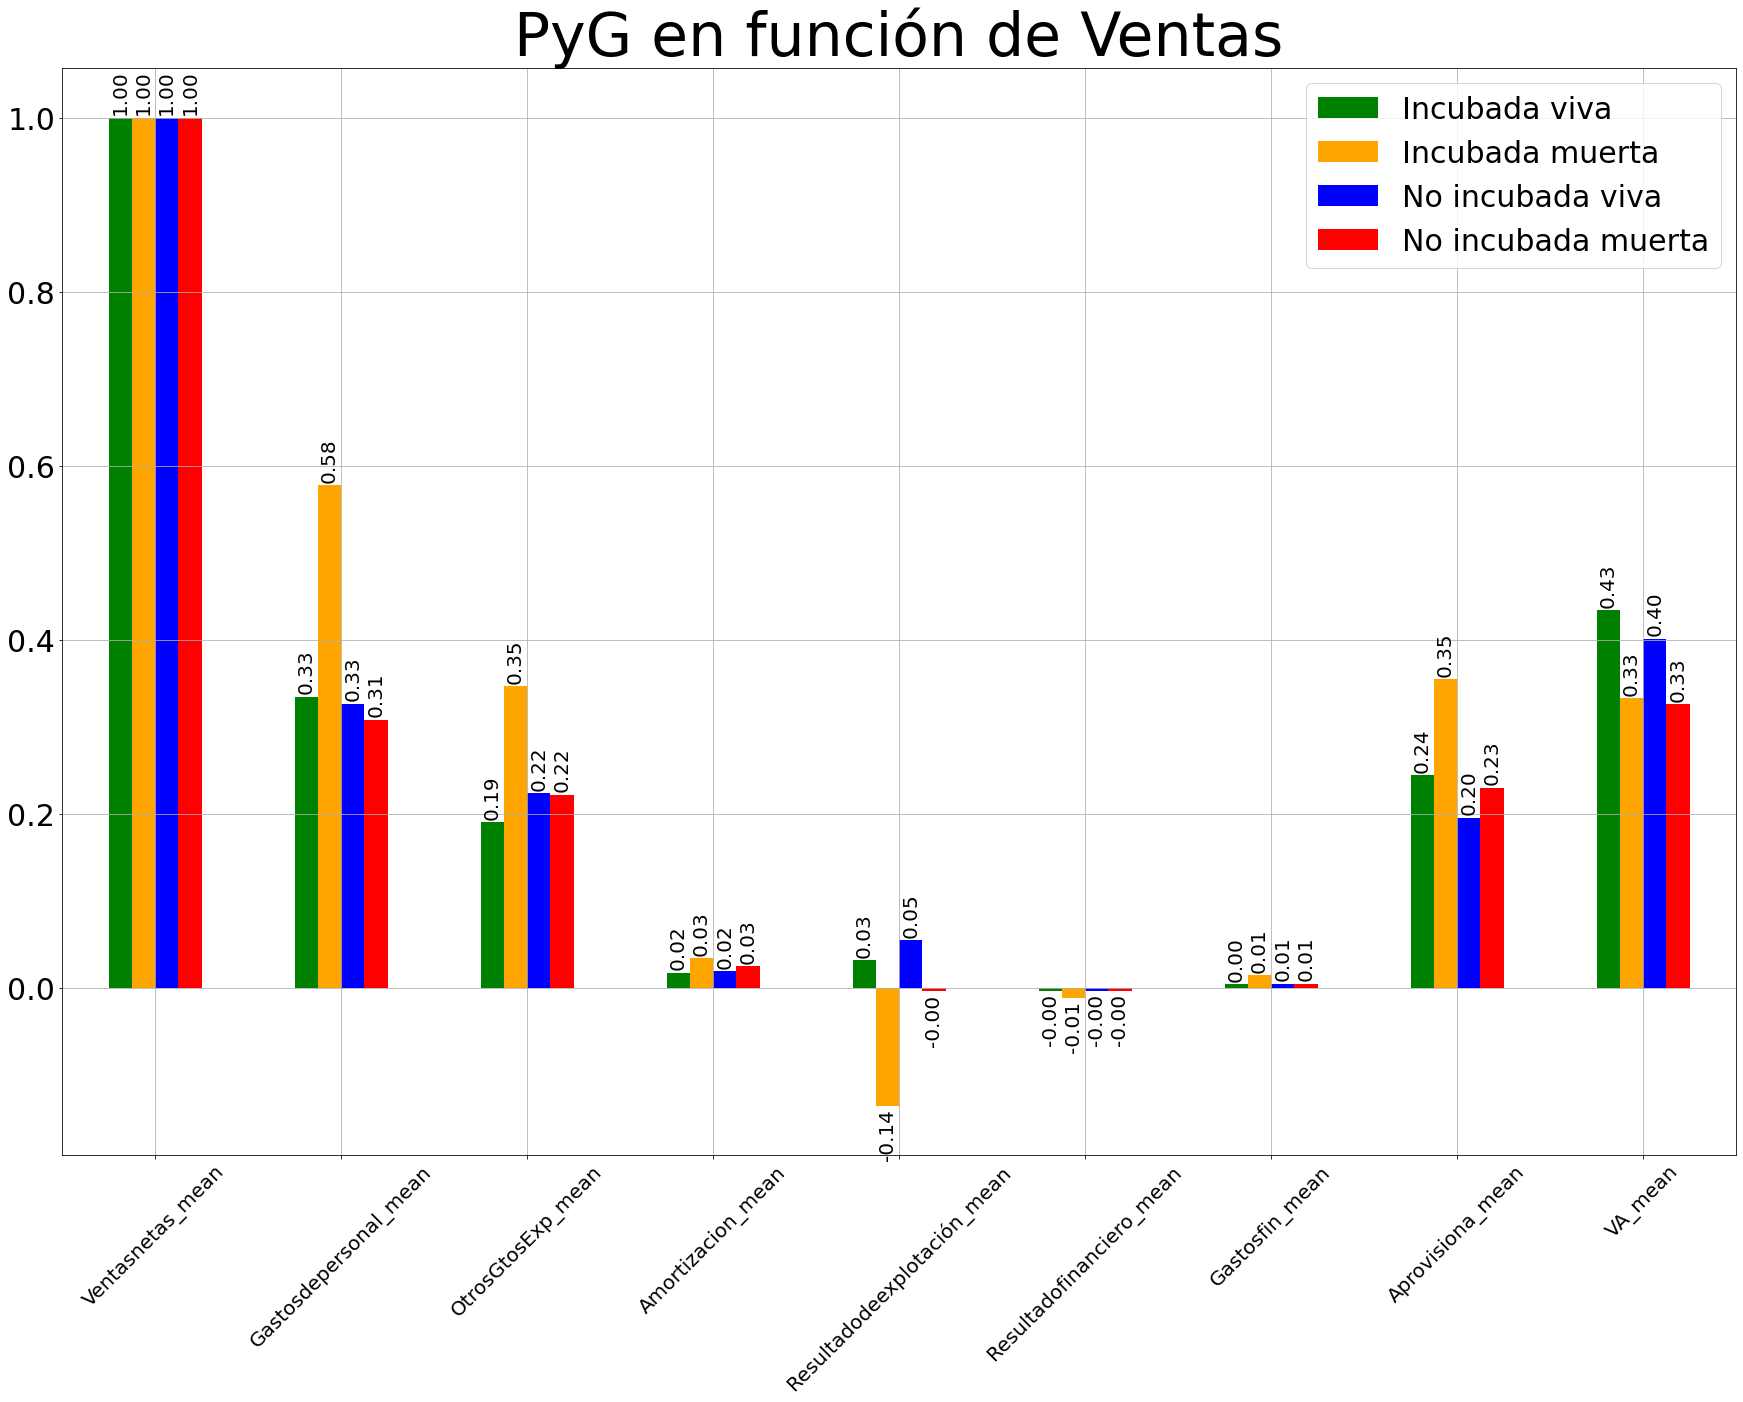

In [72]:
colors=('green','orange','blue','red')
plt.rcParams["figure.figsize"]=(30, 20)

ax = tablaventas.plot(kind='bar', color= colors) 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, rotation=90, size=20)


plt.xticks(rotation=45, size=20)
plt.yticks(size=30)
plt.legend(tablaventas.columns,prop={'size': 30})



plt.grid()
plt.title("PyG en función de Ventas", size=60)
plt.show()

### Accounting based on Total Active

In [73]:
tablabalance=balance
tablabalance.loc[:]= tablabalance.loc[:].div(tablabalance.iloc[10])

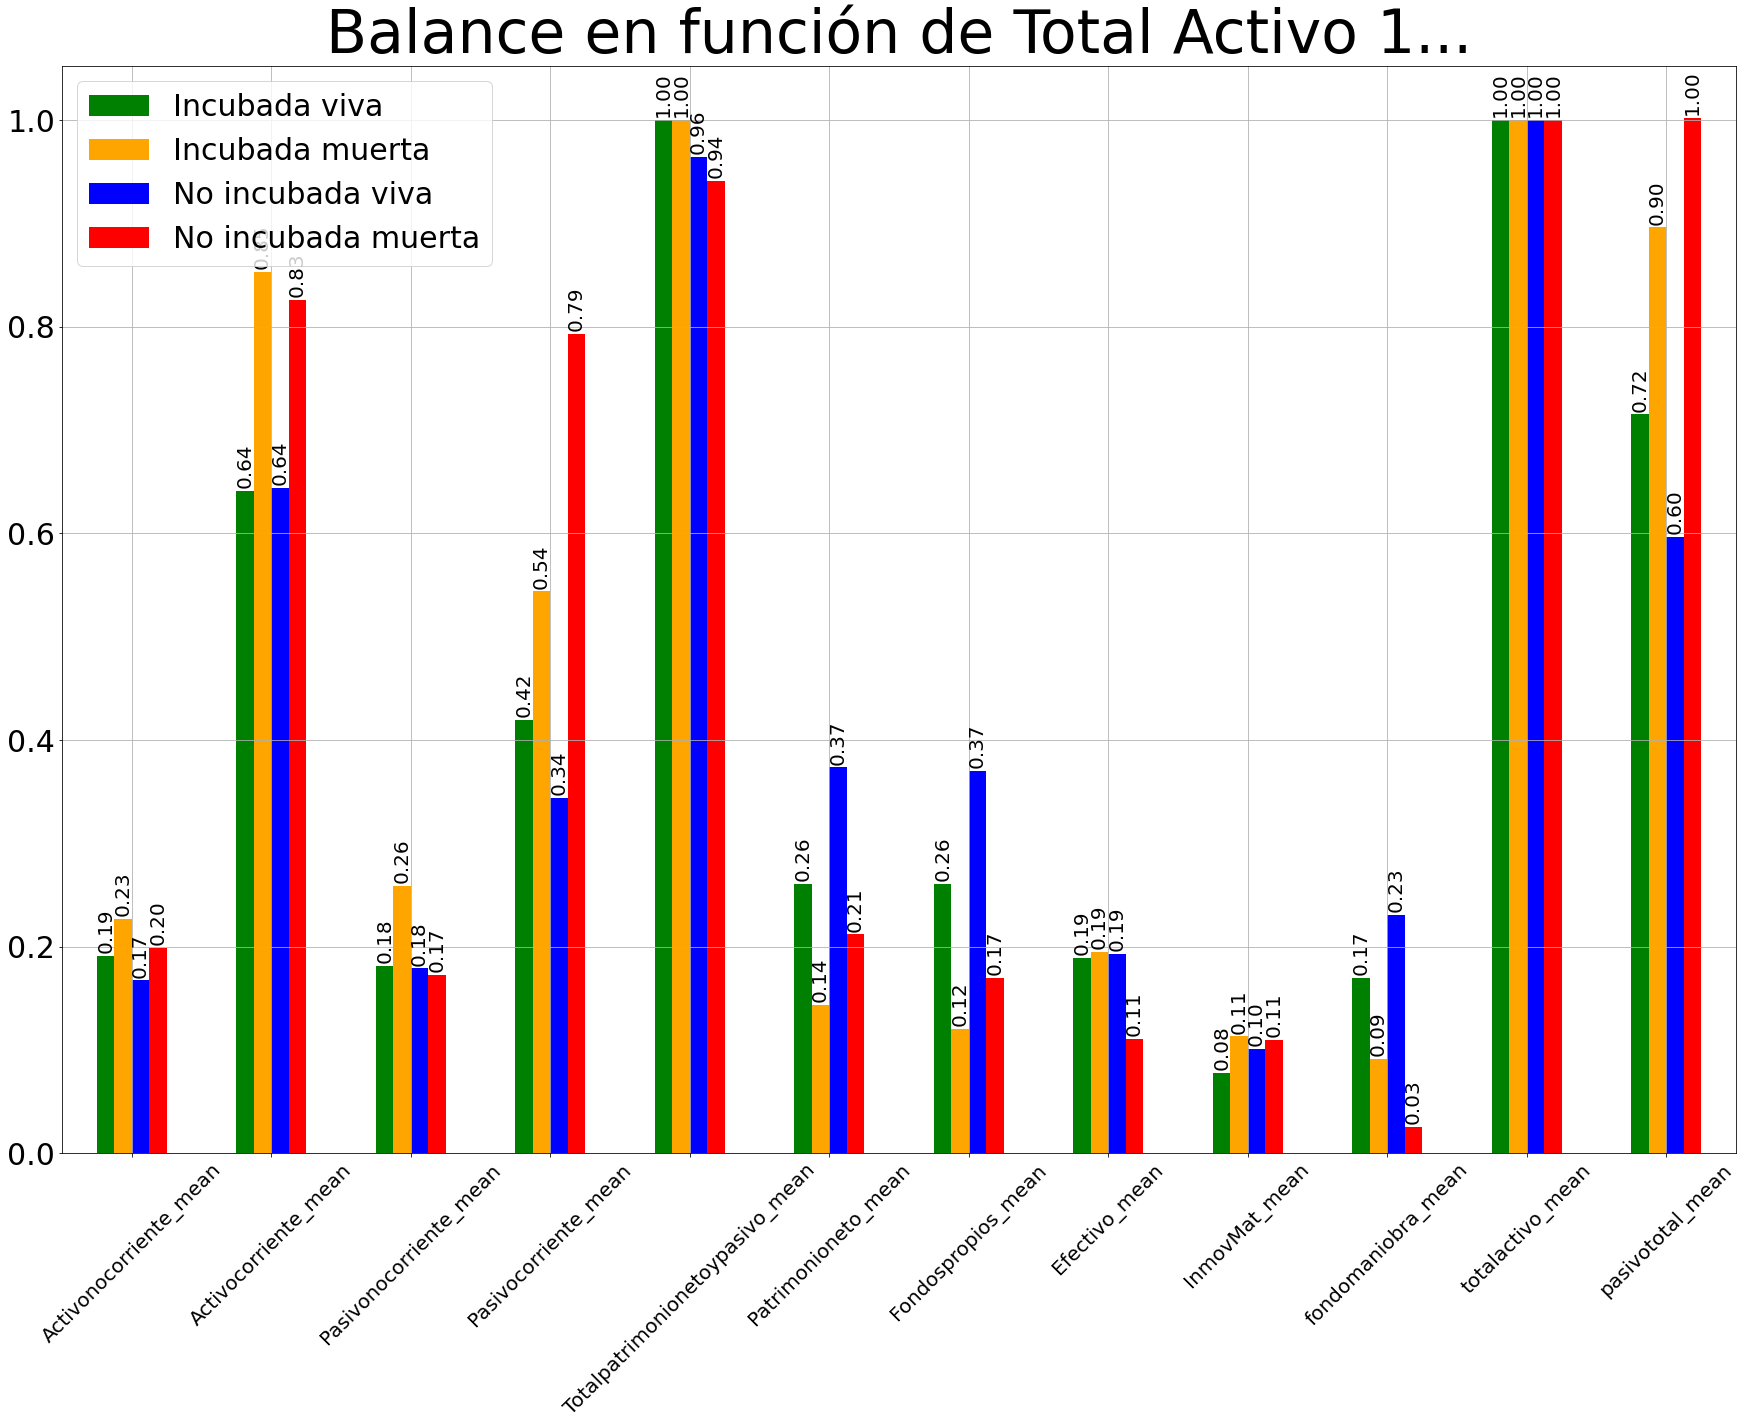

In [74]:
colors=('green','orange','blue','red')


ax = tablabalance.iloc[0:12].plot(kind='bar', color= colors) 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, rotation=90, size=20)


plt.xticks(rotation=45, size=20)
plt.yticks(size=30)
plt.legend(tablabalance.columns,prop={'size': 30})



plt.grid()
plt.title("Balance en función de Total Activo 1...", size=60)
plt.show()

### Ratios graph

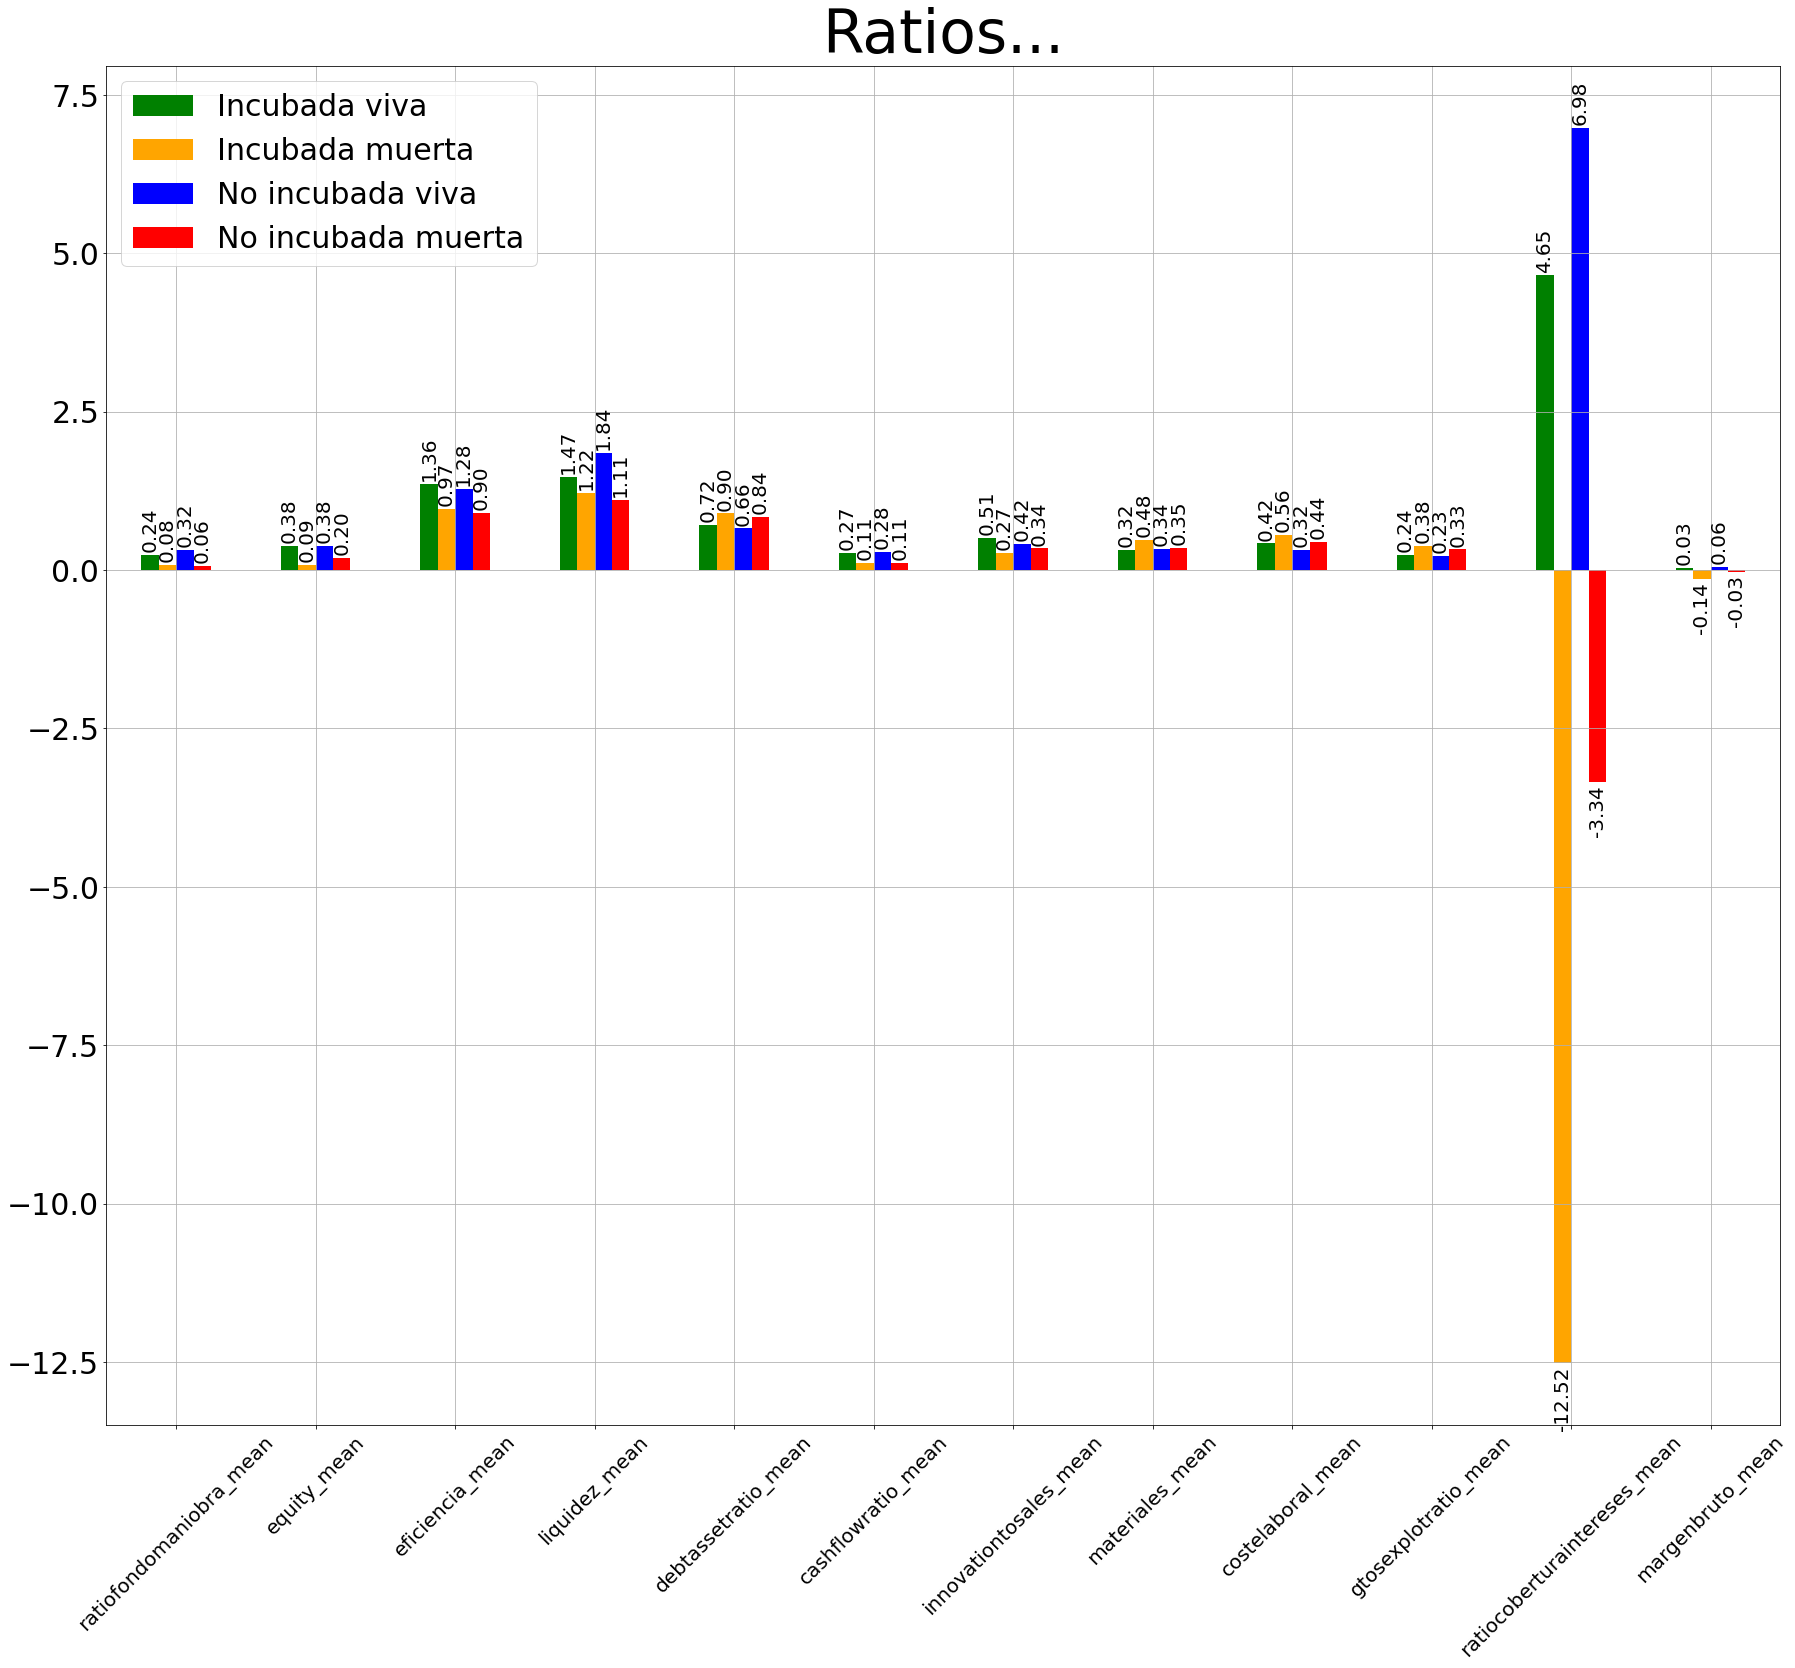

In [75]:
colors=('green','orange','blue','red')

plt.rcParams["figure.figsize"]=(30, 25)
ax = coefi.iloc[0:12].plot(kind='bar', color= colors) 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, rotation=90, size=20)


plt.xticks(rotation=45, size=20)
plt.yticks(size=30)
plt.legend(coefi.columns,prop={'size': 30})



plt.grid()
plt.title("Ratios...", size=60)
plt.show()

### Rest of quotients (variables / employee) graph 

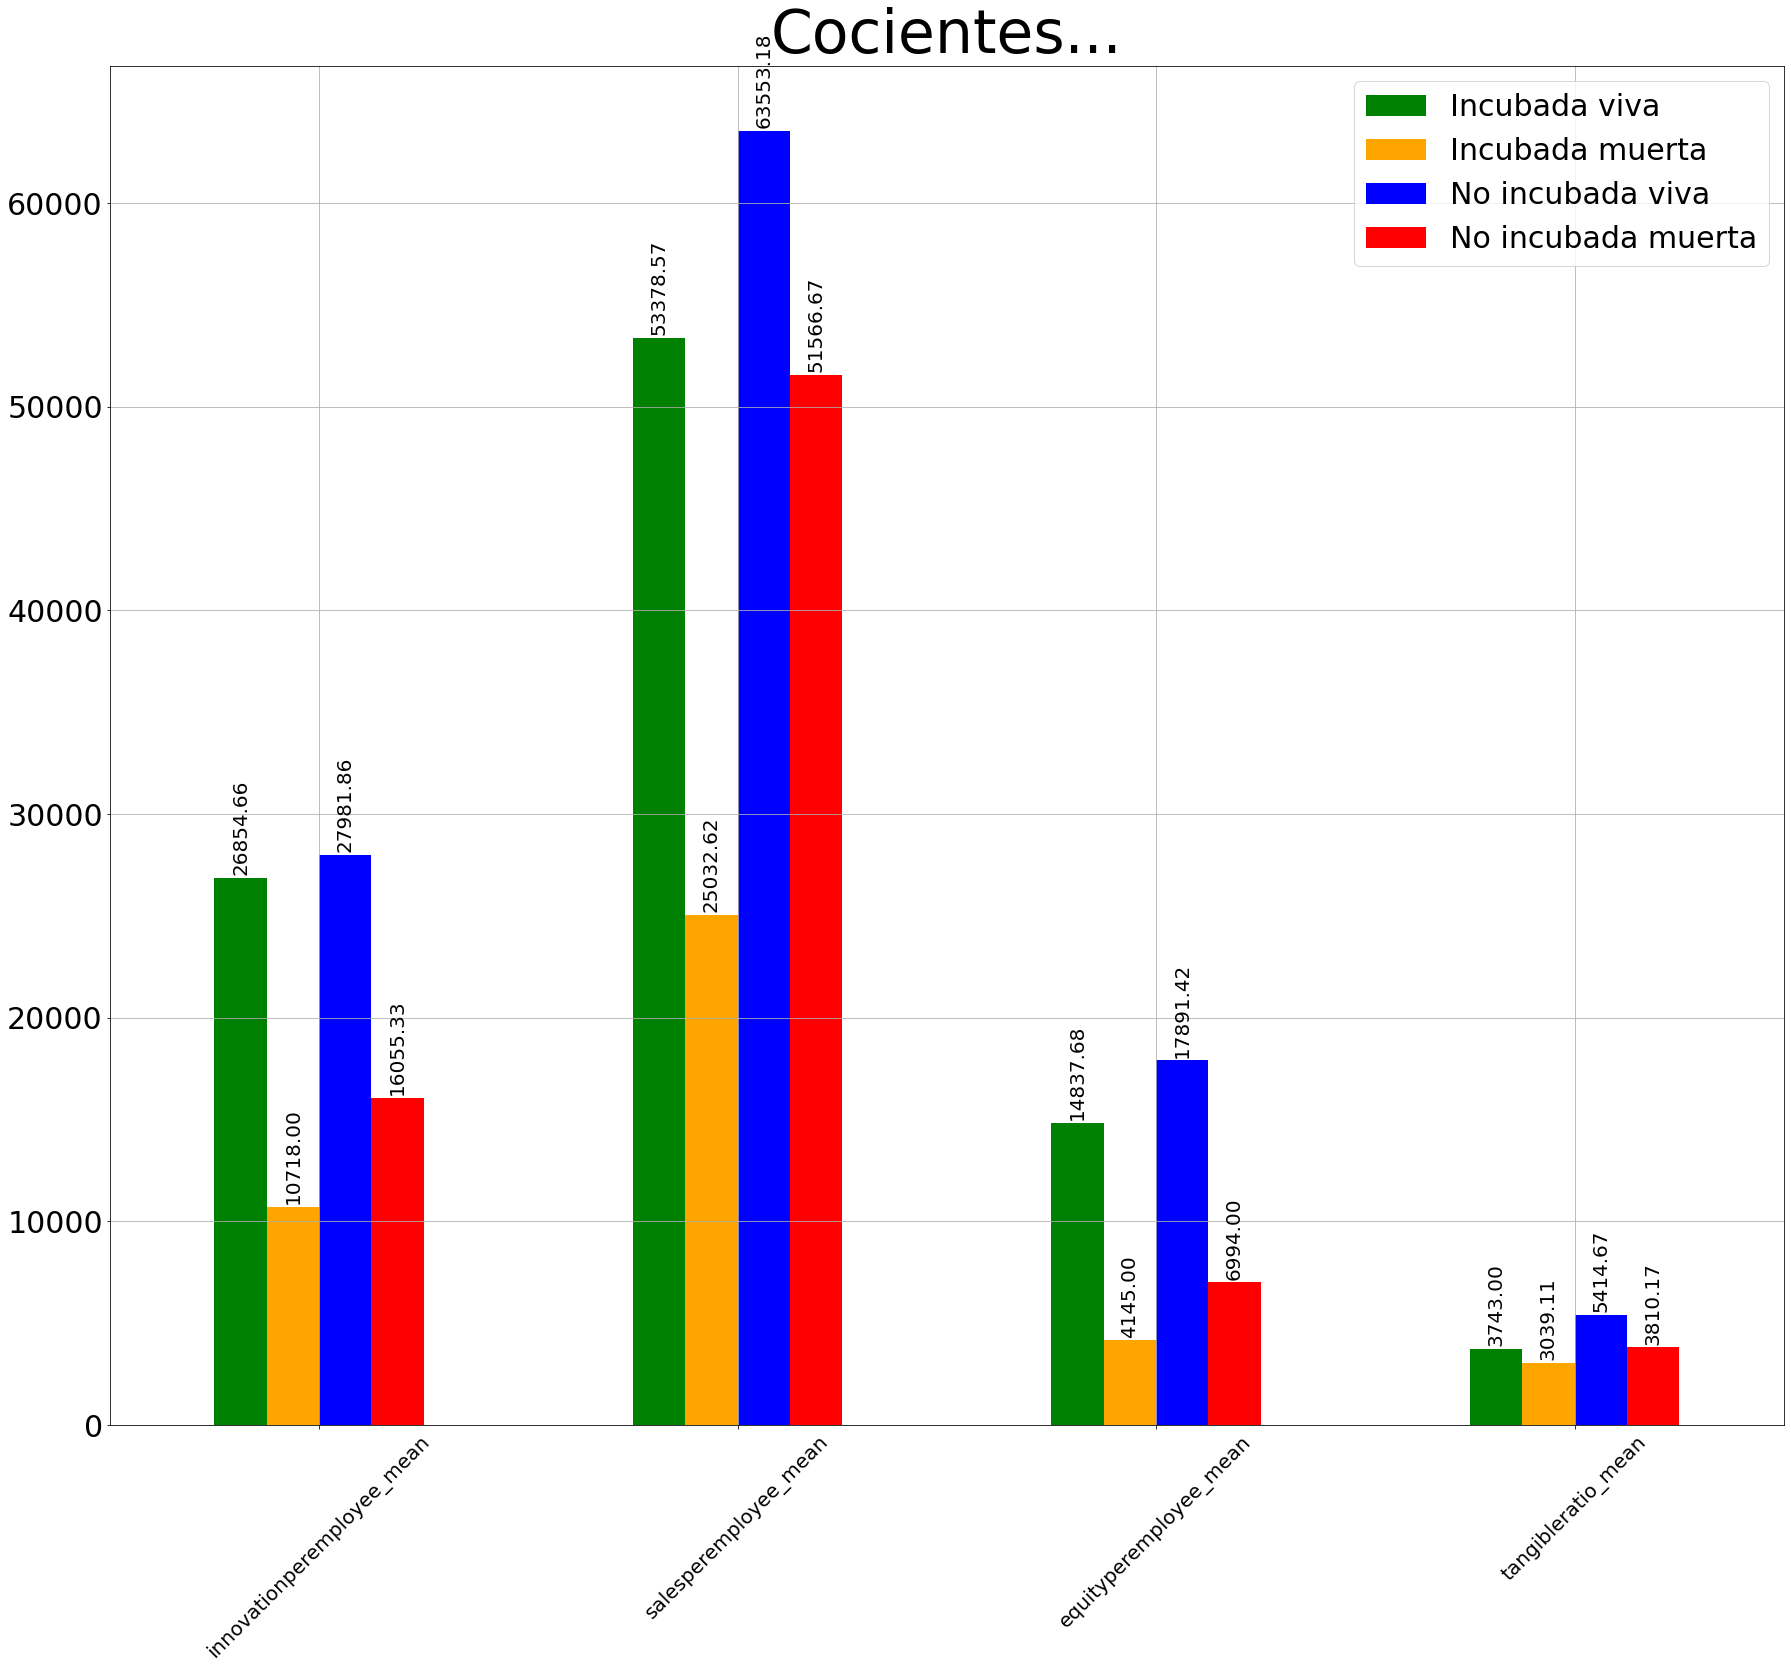

In [76]:
colors=('green','orange','blue','red')

plt.rcParams["figure.figsize"]=(30, 25)
ax = cociente.iloc[0:12].plot(kind='bar', color= colors) 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, rotation=90, size=20)


plt.xticks(rotation=45, size=20)
plt.yticks(size=30)
plt.legend(cociente.columns,prop={'size': 30})



plt.grid()
plt.title("Cocientes...", size=60)
plt.show()